# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

# <font color=green>1 CONHECENDO OS DADOS</font>
***

## <font color=green>1.1 Dataset do projeto</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

### Configurações

In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
options(repr.plot.width = 14, repr.plot.height = 10)

### Lendo o dataset do projeto

In [3]:
dados <- read.csv("dados.csv")

In [4]:
head(dados,5) # visualizando os registros do meu data set.

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,11,0,23,8,12,800,1.603808
2,11,1,23,2,12,1150,1.739790
3,11,1,35,8,15,880,1.760444
4,11,0,46,2,6,3500,1.783158
5,11,1,47,8,9,150,1.690631


---

# <font color=green>2 RODANDO UMA REGRESSÃO LINEAR</font>
***

## Dataset de exemplo
> ### $Y$ = Gasto das famílias
> ### $X$ = Renda das Famílias

In [5]:
dataset = data.frame(
    Y = c(3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770),
    X = c(9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800)
)

In [6]:
head(dataset)


,Y,X
,<dbl>,<dbl>
1,3011,9714
2,1305,3728
3,1879,6062
4,2654,8845
5,2849,8378
6,1068,3338


In [7]:
nrow(dataset)

[1] 50

### Estatísticas descritivas

In [8]:
summary(dataset)

       Y              X       
 Min.   : 353   Min.   :1069  
 1st Qu.:1362   1st Qu.:3516  
 Median :2127   Median :6363  
 Mean   :2011   Mean   :6066  
 3rd Qu.:2676   3rd Qu.:8382  
 Max.   :3302   Max.   :9997  

In [9]:
apply(dataset,2, sd) # linhas: 1 # colunas

Y         X 
 817.2146 2707.1878

### Análise gráfica

#### <font color=red>Documentações:

- [***package* ggplot2**](https://www.rdocumentation.org/packages/ggplot2)
- [**stack**](https://www.rdocumentation.org/packages/utils/versions/3.6.1/topics/stack)

In [10]:
stack(dataset) # juntando tudo em um data set completo.

values,ind
<dbl>,<fct>
3011,Y
1305,Y
1879,Y
2654,Y
2849,Y
1068,Y
2892,Y
2543,Y
3074,Y


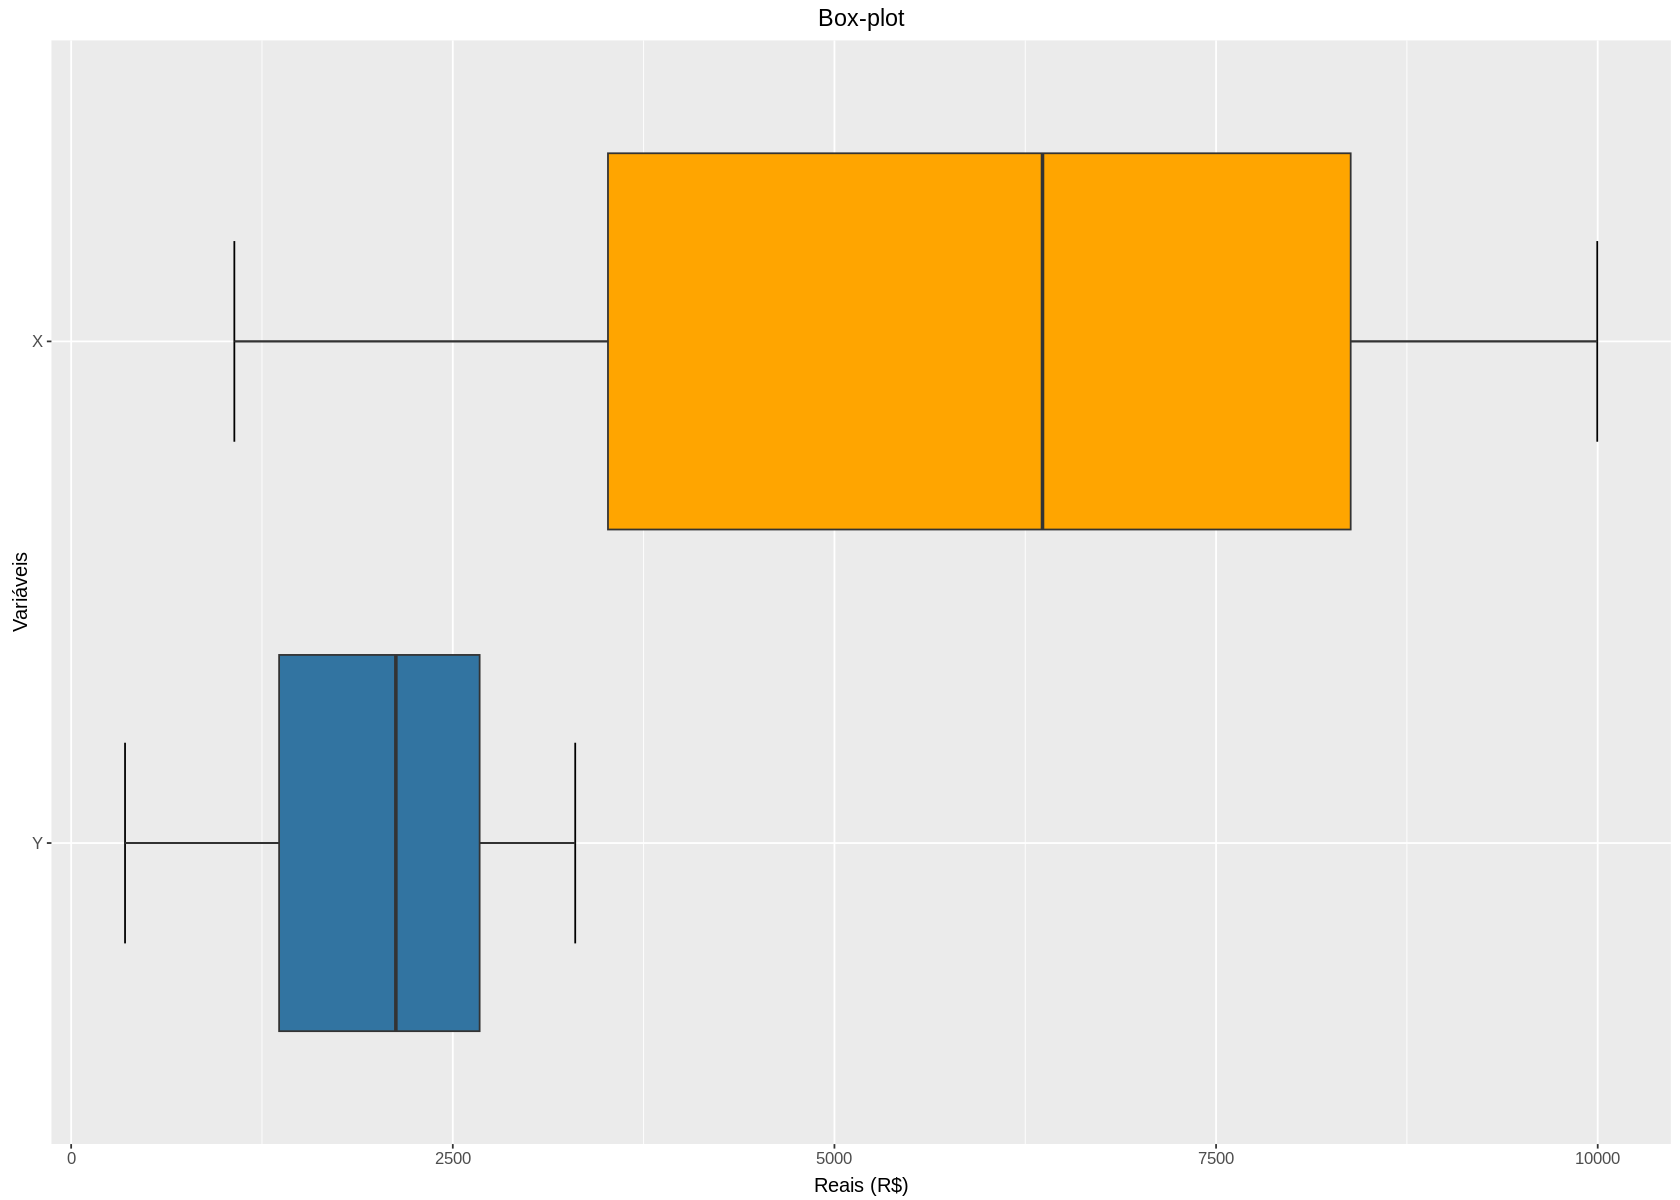

In [11]:
ggplot(stack(dataset), aes(x = ind, y = values)) +
    stat_boxplot(geom ='errorbar', width = 0.4) +
    geom_boxplot(fill = c('#3274A1', "orange")) +
    coord_flip() +
    xlab("Variáveis") +
    ylab("Reais (R$)") +
    ggtitle('Box-plot') +
    theme(
        plot.title=element_text(size = 14, hjust = 0.5),
        axis.title.y=element_text(size = 12, vjust = +0.2),
        axis.title.x=element_text(size = 12, vjust = -0.2),
        axis.text.y=element_text(size = 10),
        axis.text.x=element_text(size = 10),
    )

`geom_smooth()` using formula = 'y ~ x'


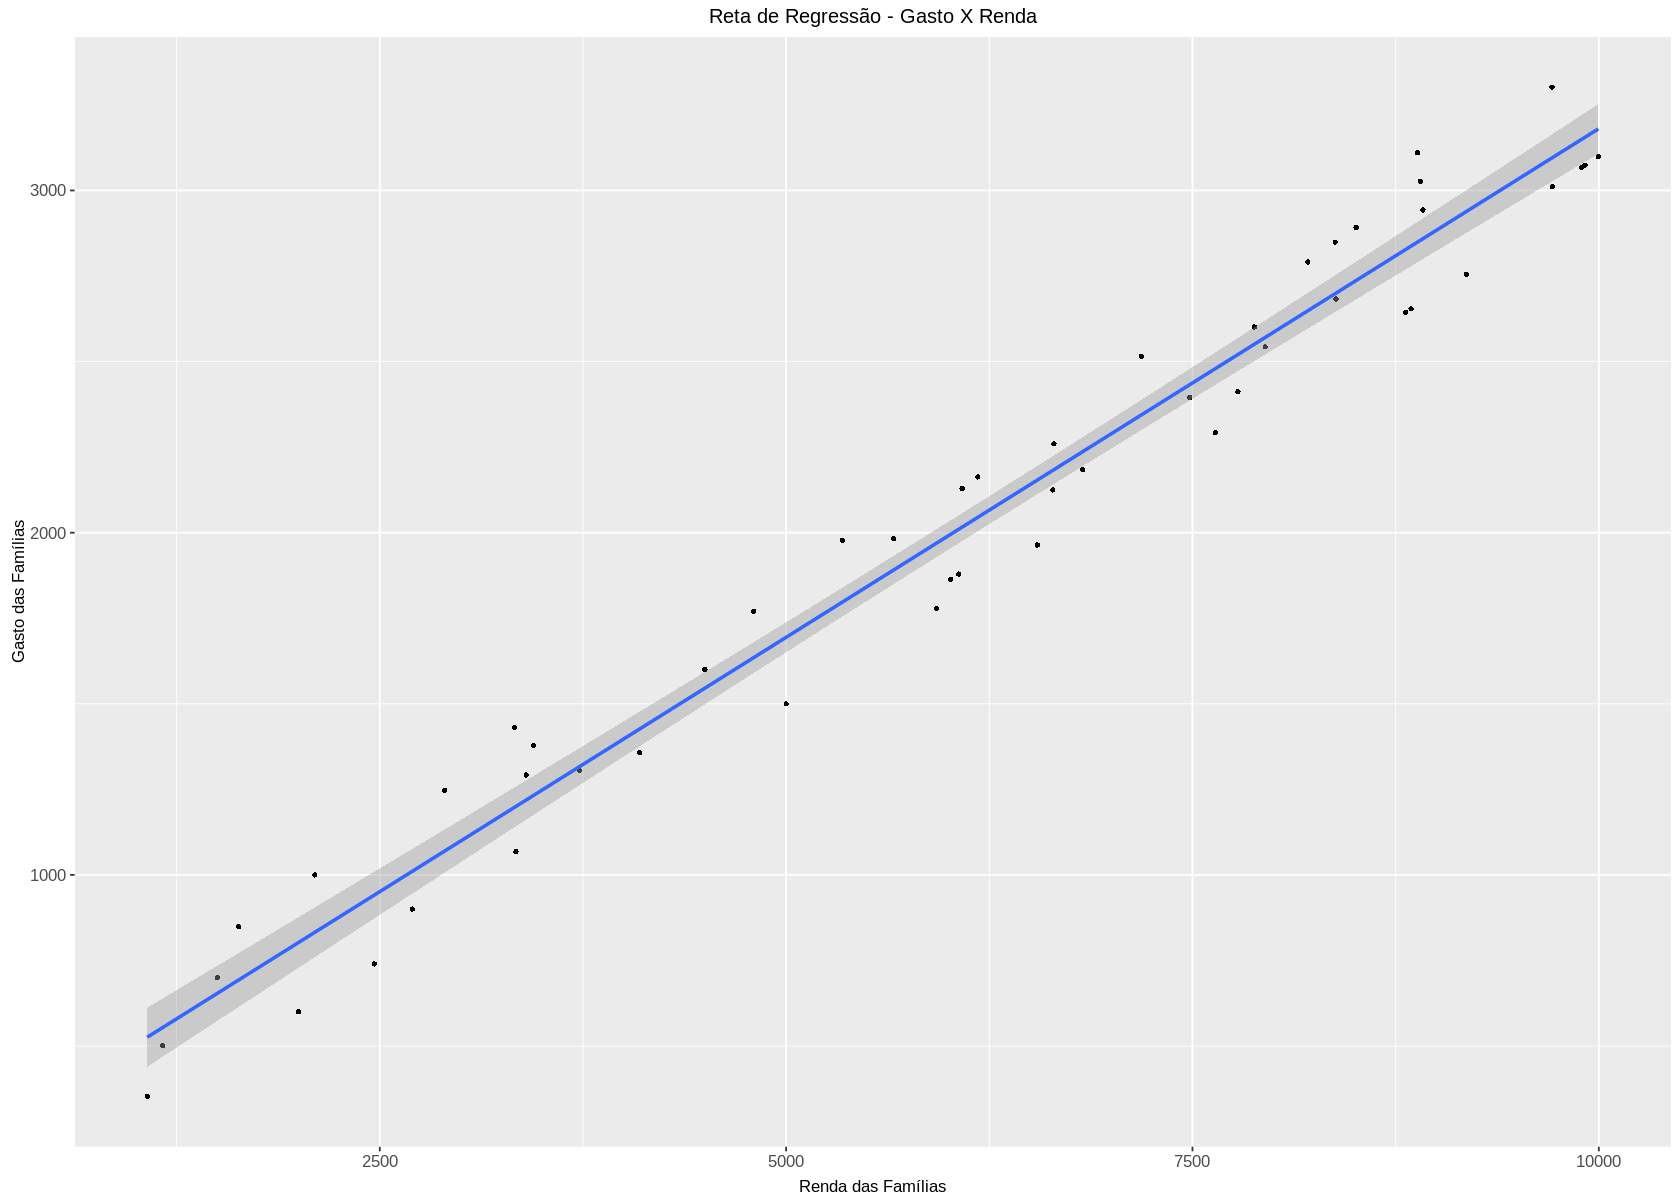

In [12]:
ggplot(data = dataset, aes(x = X, y = Y)) +
    geom_point(size = 1.5, stroke = 0) +
    geom_smooth(method = lm) +
    xlab("Renda das Famílias") +
    ylab("Gasto das Famílias") +
    ggtitle('Reta de Regressão - Gasto X Renda') +
    theme(
        plot.title=element_text(size = 12, hjust = 0.5),
        axis.title.y=element_text(size = 10, vjust = +0.2),
        axis.title.x=element_text(size = 10, vjust = -0.2),
        axis.text.y=element_text(size = 10),
        axis.text.x=element_text(size = 10),
    )

### Análise da correlação

#### <font color=red>Documentações:

- [**cor**](https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/cor)

In [13]:
cor(dataset)  # medida de correlação

,Y,X
Y,1.0000000,0.9848352
X,0.9848352,1.0000000


### Modelo de regressão linear simples

#### <font color=red>Documentações:

- [**lm**](https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/lm)

### Estimando o modelo

resultado_regressao <- l(fórmula = Y~X, data = dataset)
resultado_regressao

In [14]:
resultado_regressao <- lm(fórmula = Y~X, data = dataset)
resultado_regressao

Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument ‘fórmula’ will be disregarded”



Call:
lm(data = dataset, fórmula = Y ~ X)

Coefficients:
(Intercept)            X  
   207.9033       0.2973  


In [15]:
summary(resultado_regressao)


Call:
lm(data = dataset, fórmula = Y ~ X)

Residuals:
    Min      1Q  Median      3Q     Max 
-202.49 -125.96  -22.28  140.53  260.67 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.079e+02  5.013e+01   4.148 0.000136 ***
X           2.973e-01  7.559e-03  39.328  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 143.2 on 48 degrees of freedom
Multiple R-squared:  0.9699,	Adjusted R-squared:  0.9693 
F-statistic:  1547 on 1 and 48 DF,  p-value: < 2.2e-16


### Obtendo as previsões dentro da amostra

In [16]:
dataset['Y_previsto'] <- resultado_regressao$fitted.values
dataset

Y,X,Y_previsto
<dbl>,<dbl>,<dbl>
3011,9714,3095.7851
1305,3728,1316.2030
1879,6062,2010.0795
2654,8845,2837.4395
2849,8378,2698.6047
1068,3338,1200.2596
2892,8507,2736.9552
2543,7947,2570.4724
3074,9915,3155.5405


Este código roda uma regressão linear simples e armazena o resultado na variável resultado_regressao.

---

# <font color=green>3 CORRELAÇÃO</font>
***

## <font color=green>3.1 Covariância</font>
***

A covariância, ou variância conjunta, é a medida do grau de interdependência (ou inter-relação) numérica entre duas variáveis. É definida da seguinte maneira:

### Covariância populacional

# $$\sigma_{xy} = \frac 1n\sum_{i=1}^{n}(X_i-\mu_x)(Y_i-\mu_y)$$

### Covariância amostral

# $$S_{xy} = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})(Y_i-\bar{Y})$$

#### <font color=red>Documentações:

- [**sample**](https://www.rdocumentation.org/packages/dplyr/versions/0.7.8/topics/sample)
- [**cov**](https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/cor)

### Gerando uma amostra aleatória para facilitar o entendimento

In [17]:
amostra <- data.frame(
    Idade = c(39, 29, 21, 49, 29, 34, 32, 32, 24, 53, 28, 28, 46, 58, 41, 43, 31, 55, 52, 54),
    Renda = c(1500, 1000, 3500, 1570, 600, 1200, 2000, 500, 1300, 600, 1500, 3000, 0, 550, 1500, 1600, 746, 1000, 0, 1400),
    Anos.de.Estudo = c(6, 7, 12, 13, 9, 12, 12, 6, 7, 5, 7, 16, 12, 3, 12, 9, 1, 6, 1, 6),
    Altura = c(1.6162, 1.7525, 1.6940, 1.8041, 1.7854, 1.7468, 1.6633, 1.6937, 1.6569, 1.6671, 1.6786, 1.6730, 1.7853, 1.6090, 1.7833, 1.6709, 1.6392, 1.6861, 1.7107, 1.7288)
)

### Obtendo a matriz de covariância

In [18]:
#matriz_cov <- cov(amostra[c('Idade', "Renda")])
matriz_cov <- cov(amostra)
matriz_cov

,Idade,Renda,Anos.de.Estudo,Altura
Idade,1.344105e+02,-4947.96842,-16.4105263,0.016483684
Renda,-4.947968e+03,764668.32632,2209.0210526,-7.139630000
Anos.de.Estudo,-1.641053e+01,2209.02105,16.9368421,0.111258421
Altura,1.648368e-02,-7.13963,0.1112584,0.003353907


### Identificando as variâncias na diagonal principal da matriz

In [19]:
var(amostra$Idade) # percebemos que a diagonal principal traz o valor das variâncias.

[1] 134.4105

## <font color=green>3.2 Interpretação da Covariância</font>
***

Valor de $S_{xy}$ positivo indica uma associação linear positiva entre x e y, ou seja, à medida que o valor de x aumenta, o valor de y também aumenta. Neste caso, podemos ver na figura abaixo que os pontos que têm a maior influência sobre $S_{xy}$ devem estar nos quadrantes I e III.

Se o valor de $S_{xy}$ for negativo temos um indicativo de associação linear negativa entre x e y, ou seja, à medida que x aumenta, o valor de y diminui. Neste caso, podemos ver na figura abaixo que os pontos que têm a maior influência sobre $S_{xy}$ devem estar nos quadrantes II e IV.

Finalmente, se os pontos estiverem uniformemente distribuídos pelos quadrantes, o valor de $S_{xy}$ se aproximará de zero, indicando que não existe nenhuma associação linear entre x e y.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img026.png" width=50%>

### Verificando a existência de uma associação linear negativa

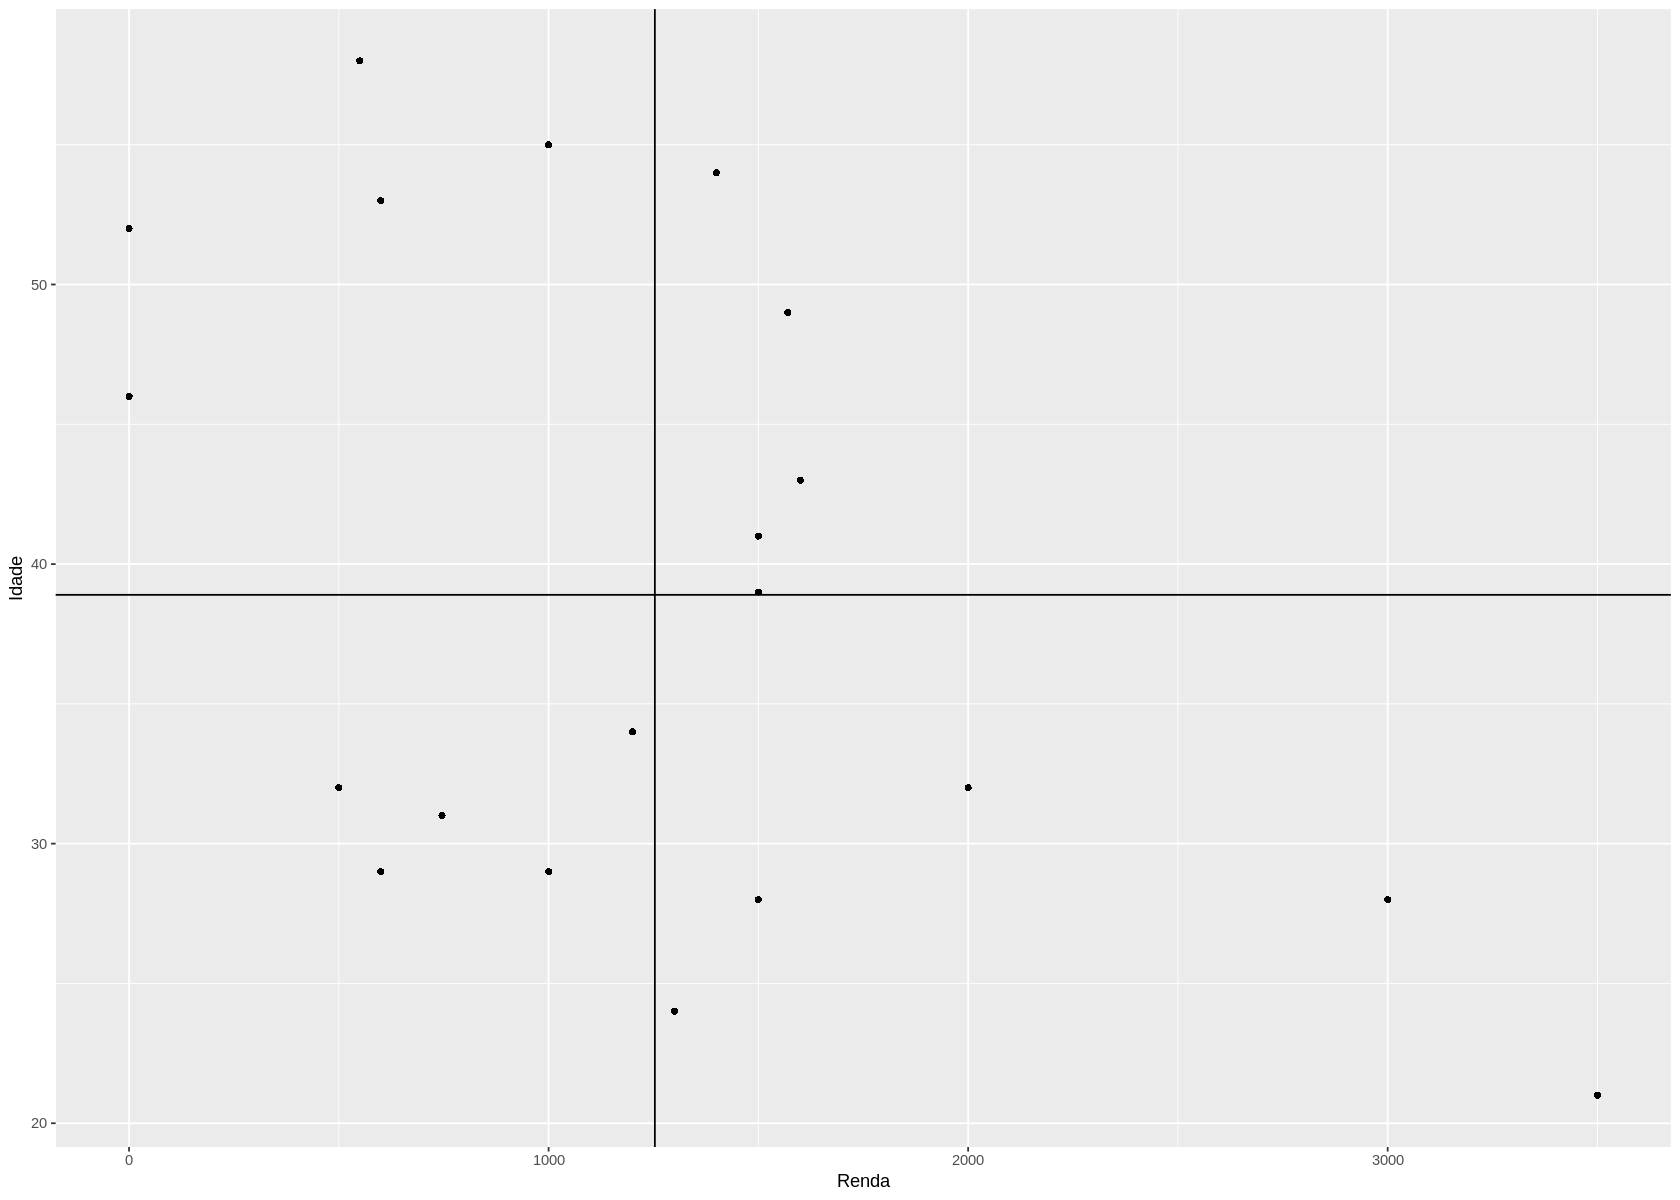

In [20]:
grafico <- amostra[, c('Renda', 'Idade')]

ggplot(data = grafico, aes(x = Renda, y = Idade)) +
    geom_point(size = 2, stroke = 0) +
    geom_hline(yintercept = mean(amostra$Idade), color = 'black') +
    geom_vline(xintercept = mean(amostra$Renda), color = 'black')

### Verificando a existência de uma associação linear positiva

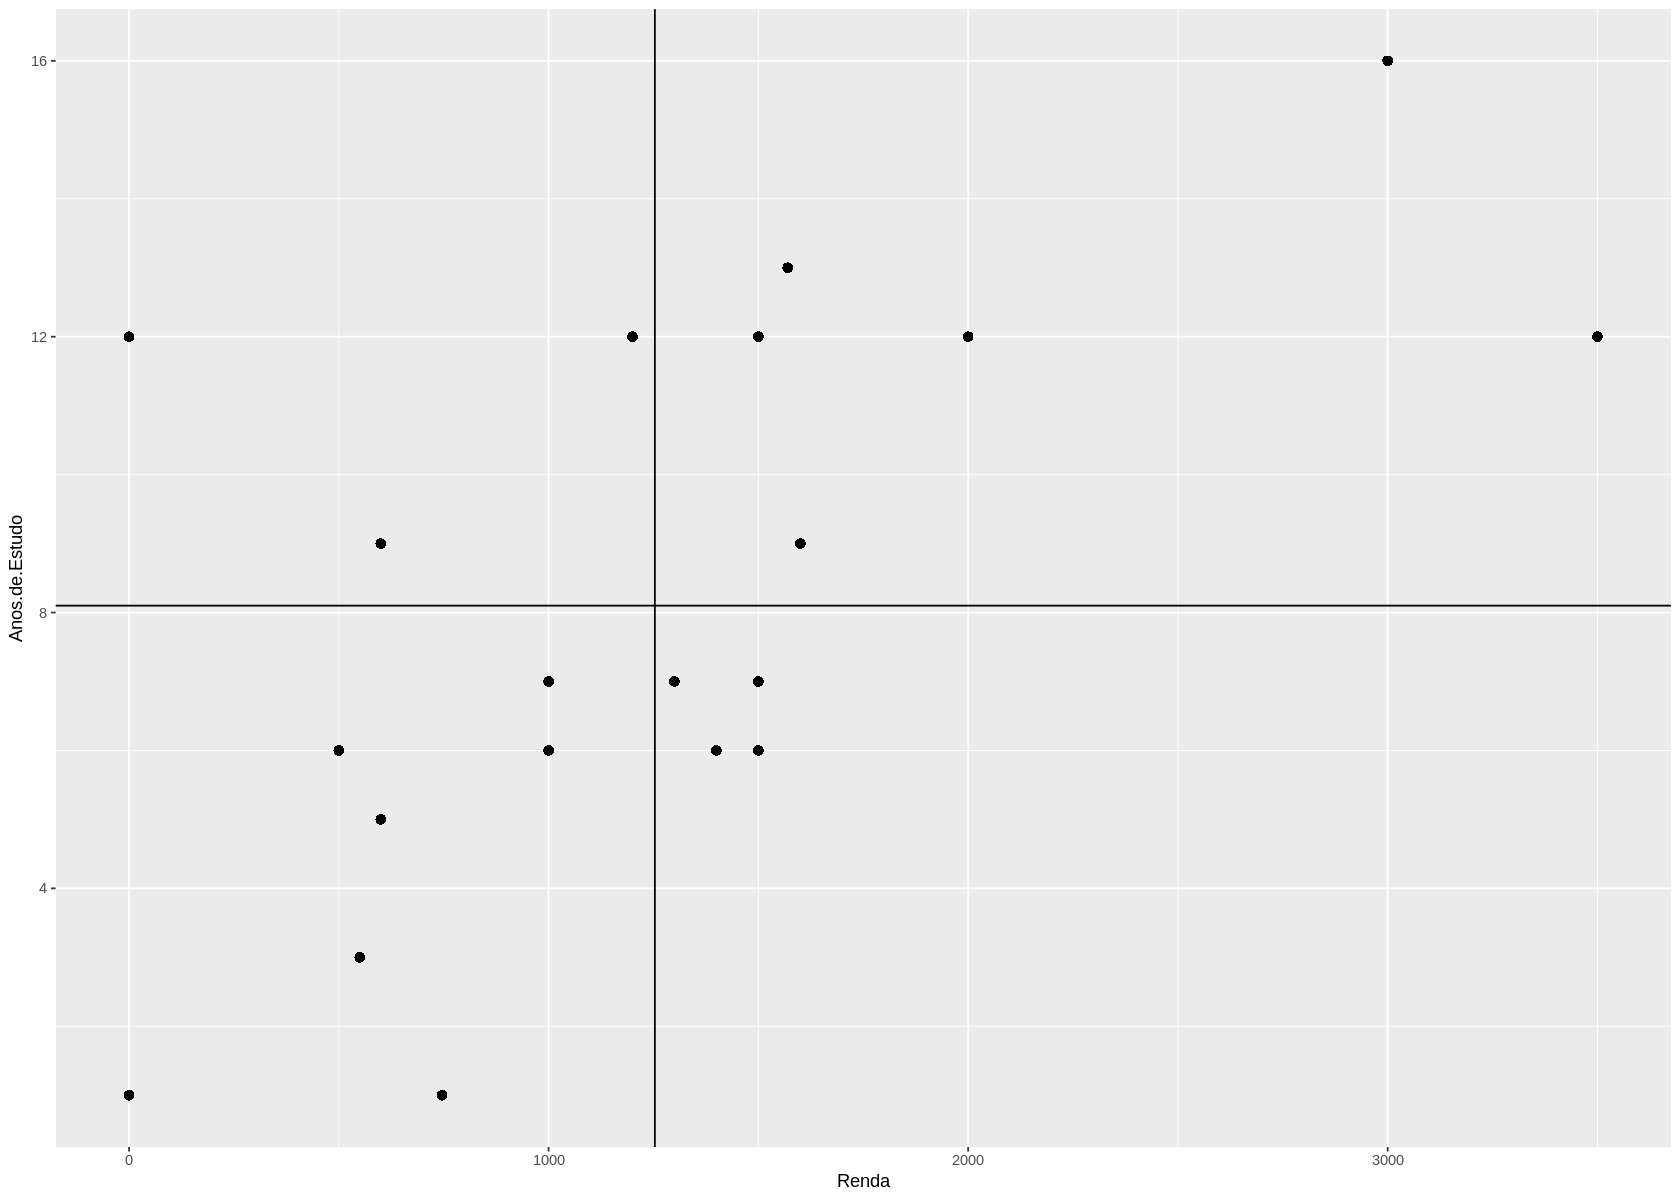

In [21]:
grafico <- amostra[, c('Renda', 'Anos.de.Estudo')]

ggplot(data = grafico, aes(x = Renda, y = Anos.de.Estudo)) +
    geom_point(size = 3, stroke = 0) +
    geom_hline(yintercept = mean(amostra$'Anos.de.Estudo'), color = 'black') +
    geom_vline(xintercept = mean(amostra$Renda), color = 'black')

### Verificando a inexistência de uma associação linear entre as variáveis

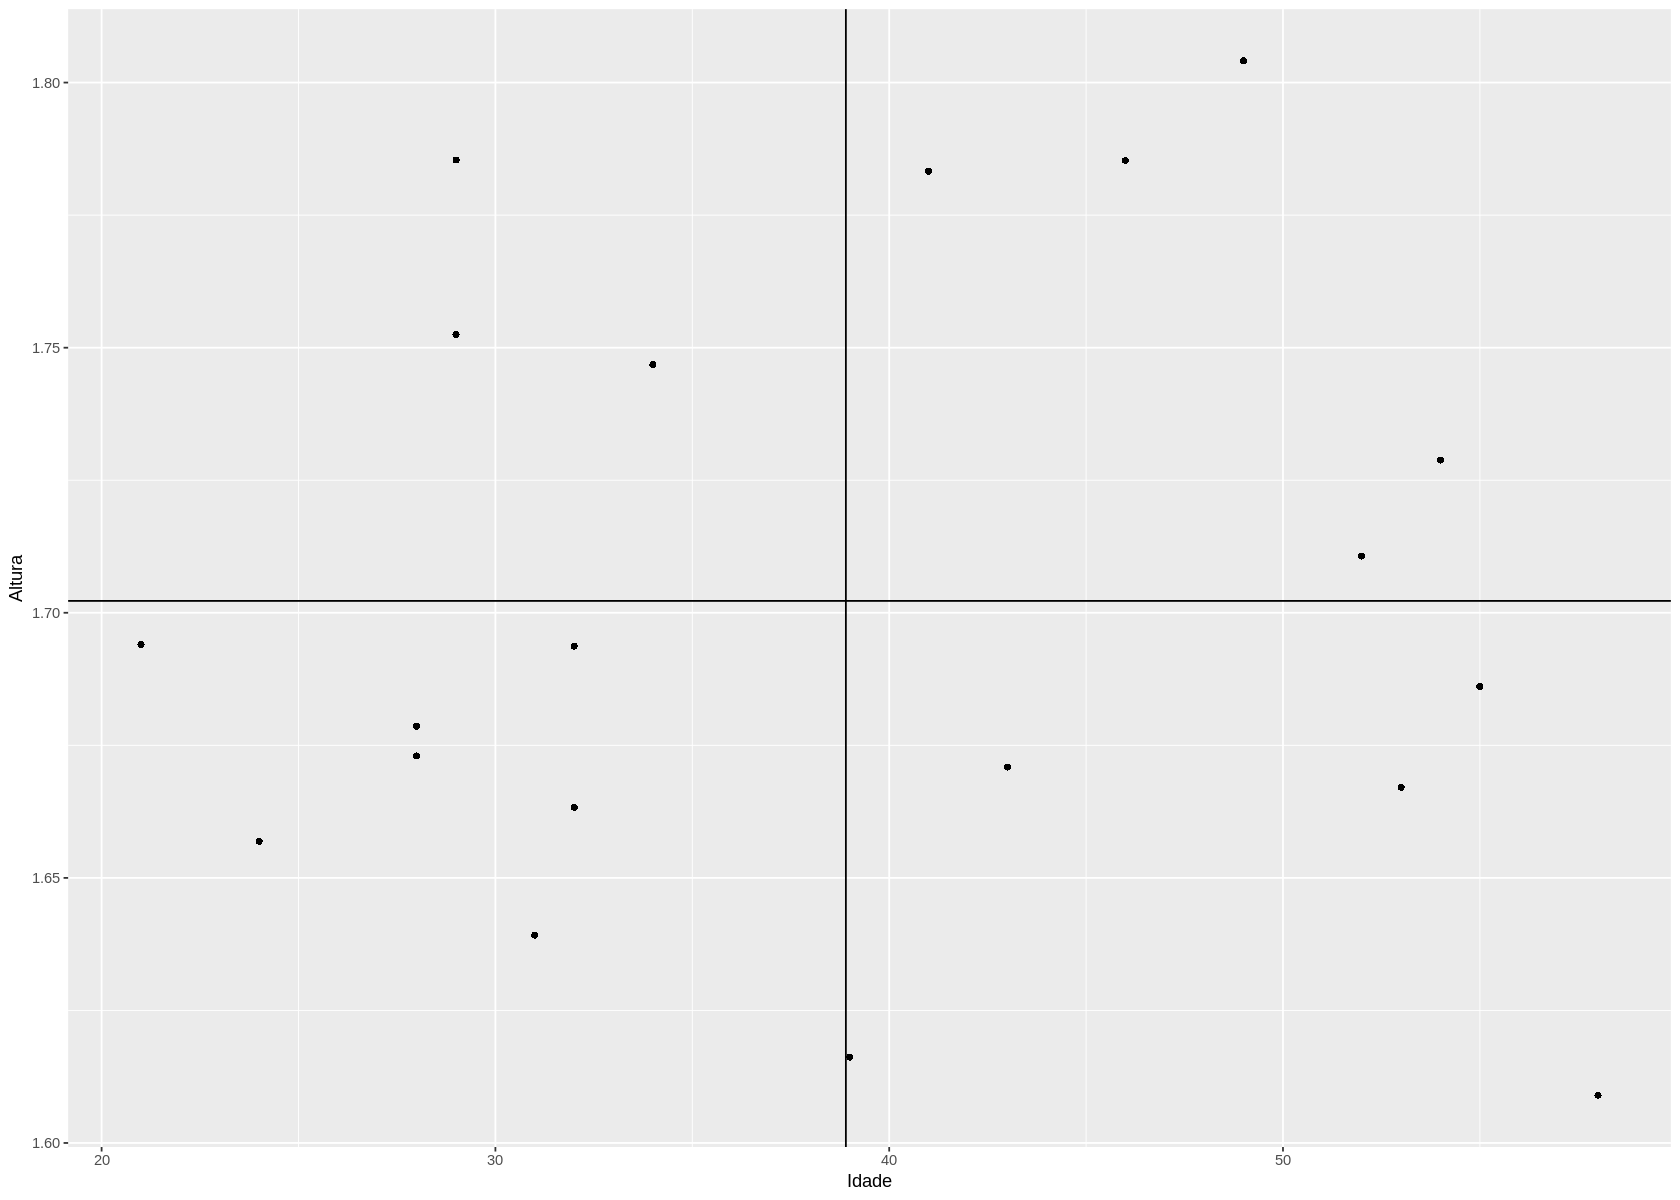

In [22]:
grafico <- amostra[, c('Idade', 'Altura')]

ggplot(data = grafico, aes(x = Idade, y = Altura)) +
    geom_point(size = 2, stroke = 0) +
    geom_hline(yintercept = mean(amostra$Altura), color = 'black') +
    geom_vline(xintercept = mean(amostra$Idade), color = 'black')

### <font color='red'>Observação Importante:</font>
> Pelo que foi apresentado pode parecer que valores elevados, tanto positivos quanto negativos, para a covariância indicam relações lineares fortes entre as variáveis envolvidas. No entanto, um problema quando se usa a covariância como uma medida da intensidade da relação linear é que o valor da covariância depende das unidades de medida para x e y.
>
> Uma medida da relação entre duas variáveis que não é afetada pelas unidades de medida para x e y é o coeficiente de correlação que veremos no próximo tópico.

## <font color=green>3.3 Coeficiente de correlação de Pearson</font>
***

É obtido dividindo-se a covariância da população ou amostra pelo produto do desvio padrão populacional ou amostral de x pelo desvio padrão populacional ou amostral de y.

O coeficiente de correlação varia de -1 a +1. Valores que se aproximam de -1 ou +1 indicam uma relação linear forte. Quanto mais próxima a correlação estiver de zero, mais fraca será a relação.

Um ponto importante é que o coeficiente de correlação é uma medida de associação linear e não necessariamente de causação. Uma correlação alta entre duas variáveis não significa, necessariamente, que variações em uma delas provocará alterações na outra.

### Coeficiente de correlação de Pearson - dados populacionais

# $$\rho_{xy} = \frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}$$

### Coeficiente de correlação de Pearson - dados amostrais

# $$r_{xy} = \frac{s_{xy}}{s_{x}s_{y}}$$

Onde

$\sigma_{xy}$ = covariância populacional entre x e y

$s_{xy}$ = covariância amostral entre x e y

$\sigma_{x}$ e $\sigma_{y}$ = desvios padrão populacionais de x e y, respectivamente

$s_{x}$ e $s_{y}$ = desvios padrão amostrais de x e y, respectivamente

### Obtendo $s_{xy}$

In [23]:
s_xy <- cov(amostra[c('Altura','Renda')])
s_xy

,Altura,Renda
Altura,0.003353907,-7.13963
Renda,-7.139630000,764668.32632


In [24]:
s_xy <- s_xy[1,2]
#s_xy <- s_xy['Renda','Altura']
s_xy

[1] -7.13963

### Obtendo $s_x$ e $s_y$

In [25]:
s_x <- sd(amostra$Renda)
s_y <- sd(amostra$Altura)

### Obtendo o coeficiente de correlação $r_{xy}$

In [26]:
r_xy <- s_xy/(s_x*s_y)
r_xy

[1] -0.140982

### Obtendo uma matriz de correlação

In [27]:
cor(amostra[c('Altura','Renda')])

,Altura,Renda
Altura,1.000000,-0.140982
Renda,-0.140982,1.000000


In [28]:
cor(dataset[c('Y',"X")])

,Y,X
Y,1.0000000,0.9848352
X,0.9848352,1.0000000


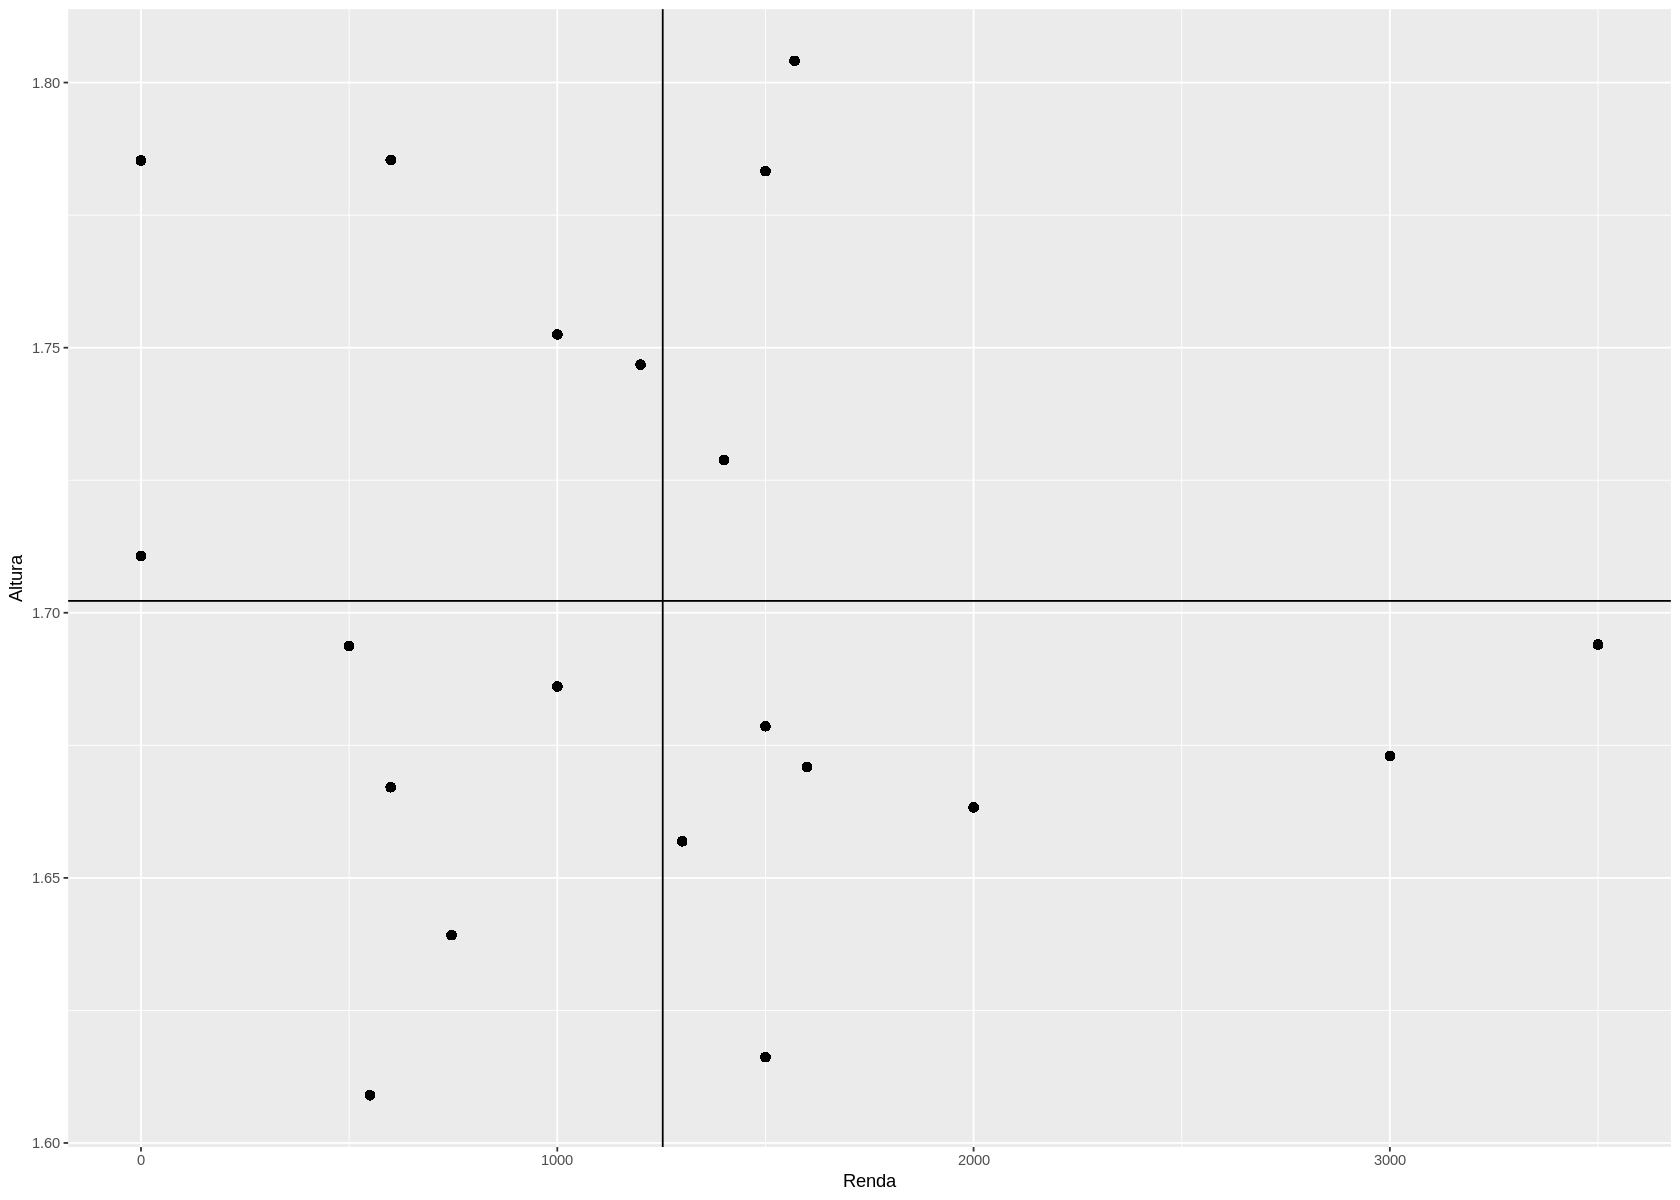

In [29]:
grafico <- amostra[, c('Renda', 'Altura')]

ggplot(data = grafico, aes(x = Renda, y = Altura)) +
    geom_point(size = 3, stroke = 0) +
    geom_hline(yintercept = mean(amostra$Altura), color = 'black') +
    geom_vline(xintercept = mean(amostra$Renda), color = 'black')

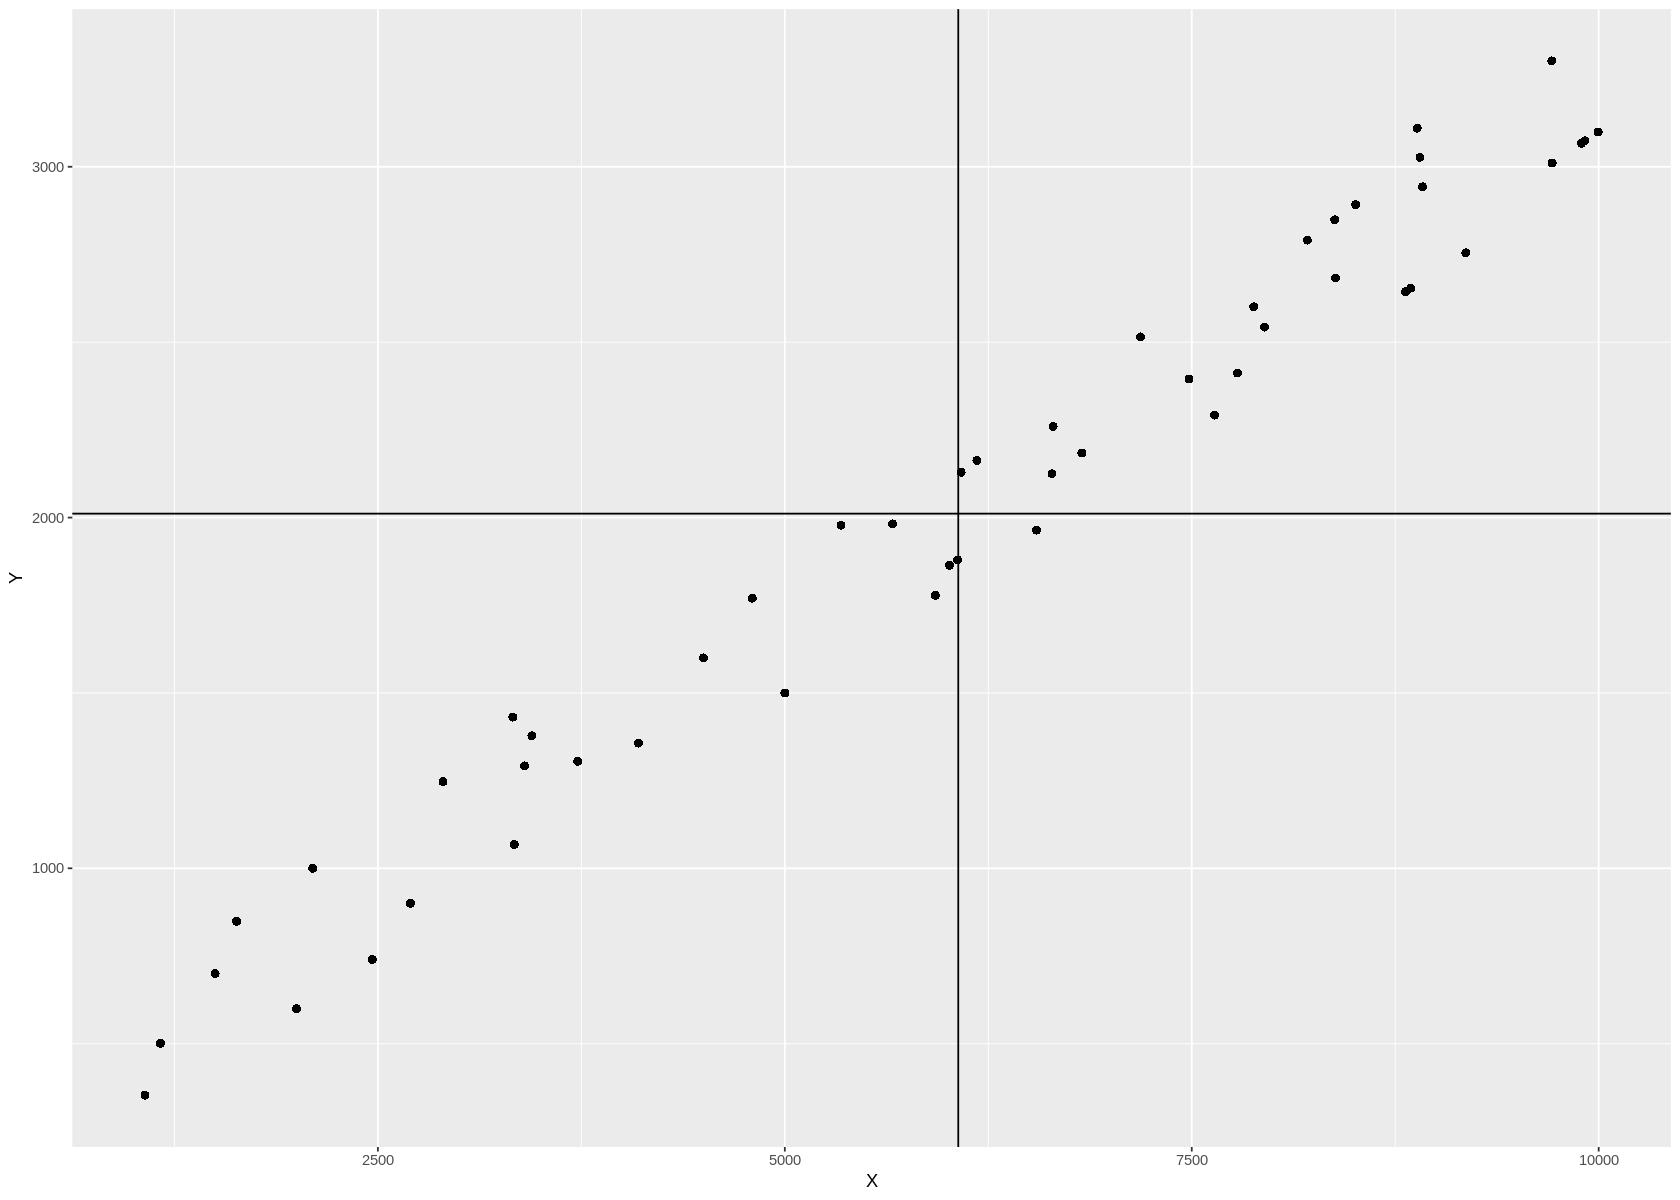

In [30]:
ggplot(data = dataset, aes(x = X, y = Y)) +
    geom_point(size = 2.5, stroke = 0) +
    geom_hline(yintercept = mean(dataset$Y), color = 'black') +
    geom_vline(xintercept = mean(dataset$X), color = 'black')

Temos o seguinte conjunto de informações sobre as variáveis X e Y:

$\sigma_{xy}$ = 2.178.803,59

$\sigma^2_{x}$ = 7.328.865,85

$\sigma^2_{Y}$ = 667.839,78

Qual o  valor do coeficiente de correlação de Pearson para as variáveis X e Y.

---

In [31]:
coeficiente_pearson <- 2178803.59/(sqrt(7328865.85)*sqrt(667839.78))
coeficiente_pearson

[1] 0.9848352

# <font color=green>4 REGRESSÃO LINEAR</font>
***

A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável dependente) em relação a uma ou mais variáveis, as variáveis explicativas ou independentes, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.

#### Terminologia

> A variável que é prevista é conhecida como variável dependente (*Y*).

> A variável utilizada para prever o valor da variável dependente é conhecida como variável independente (*X*).

Em nosso treinamento vamos abordar o tipo mais simples de análise de regressão que considera uma variável dependente e apenas uma variável independente onde a relação entre as variáveis se aproxima de uma linha reta.

## <font color=green>4.1 Regressão linear simples</font>
***

### Função consumo

Um economista concluiu
 que os indivíduos tendem a aumentar o seu consumo conforme sua renda aumenta. Logicamente esta teoria ganhou um pouco mais de complexidade, mas vamos utilizar sua forma mais simples para entender o procedimento de análise de regressão com a seguninte formulação:

# $$Y_i = \beta_1 + \beta_2X_i$$

Onde

- $Y_i$ é o gasto das famílias ou consumo das famílias

- $X_i$ é a renda disponível

- $\beta_1$ é conhecido como intercepto (no modelo teórico acima é conhecido como consumo autônomo, ou seja, o consumo quando o rendimento é zero)

- $\beta_2$ é o coefiente angular (no modelo teórico é a propensão marginal a consumir)

Em uma análise de regressão linear simples, o interesse está em estimar a função de regressão populacional como a apresentada acima, ou seja, estimar os valores dos parâmetros $\beta_1$ e $\beta_2$ com base nas observações de $Y$ e $X$.

### Carregando o dataset

In [32]:
dataset <- data.frame(
    Y = c(3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770),
    X = c(9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800)
)

In [33]:
head(dataset)

,Y,X
,<dbl>,<dbl>
1,3011,9714
2,1305,3728
3,1879,6062
4,2654,8845
5,2849,8378
6,1068,3338


### Identificando a relação entre as variáveis

Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.

`geom_smooth()` using formula = 'y ~ x'


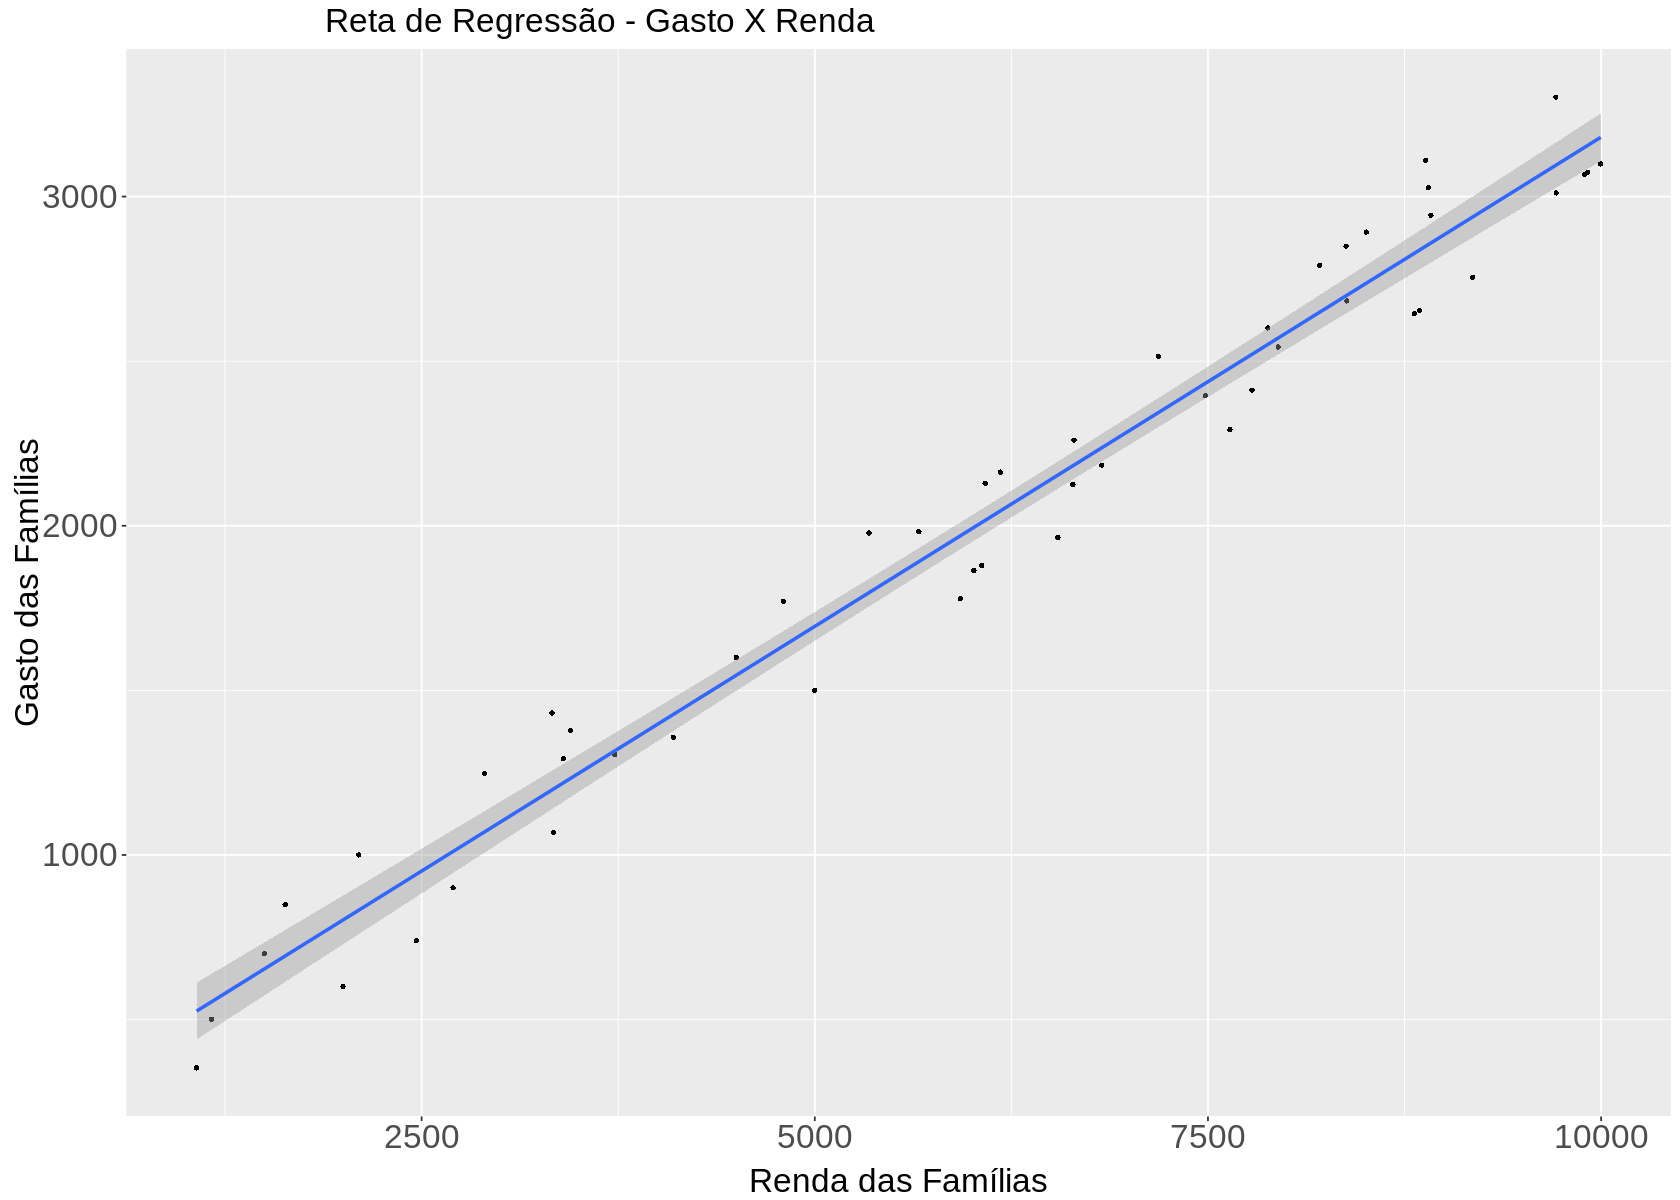

In [34]:
ggplot(data = dataset, aes(x = X, y = Y)) +
    geom_point(size = 1.5, stroke = 0) +
    geom_smooth(method = lm) +
    xlab("Renda das Famílias") +
    ylab("Gasto das Famílias") +
    ggtitle('Reta de Regressão - Gasto X Renda') +
    theme(
        plot.title=element_text(size = 20, hjust = 0.2),
        axis.title.y=element_text(size = 20, vjust = +0.2),
        axis.title.x=element_text(size = 20, vjust = -0.2),
        axis.text.y=element_text(size = 20),
        axis.text.x=element_text(size = 20),
    )

### Matriz de correlação

In [35]:
cor(dataset)

,Y,X
Y,1.0000000,0.9848352
X,0.9848352,1.0000000


### Função de regressão populacional

A equação formulada acima é conhecida como **função de regressão populacional (FRP)** e em alguns livros é também representada da seguinte forma:

# $$E(Y|X_i) = \beta_1 + \beta_2X_i$$

Ela afirma que o valor esperado da distribuição de $Y$, dado $X_i$, tem uma relação funcional com $X_i$, isto é, a resposta média de $Y$ varia com $X$. Os coeficientes $\beta_1$ e $\beta_2$ são conhecidos como coeficientes de regressão e também como intercepto e coeficiente angular, respectivamente.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img027.png" width=50%>

O gráfico de dispersão mais abaixo deixa claro que com o aumento da renda familiar, em média, as despesas de consumo das famílias aumentam, mas não no mesmo nível. O que podemos dizer é que para um nível de renda $X_i$ as despesas médias de consumo de uma
família agrupam-se em torno do consumo médio de todas as famílias deste nível $X_i$, isto é, em torno de sua esperança condicional $E(Y|X_i)$. Portanto, podemos expressar o desvio individual de $Y_i$ em torno de seu valor esperado da seguinte forma:

# $$u_i = Y_i - E(Y|X_i)$$

ou

# $$Y_i = E(Y|X_i) + u_i$$

onde o desvio $u_i$ é uma variável aleatória não-observável que assume valores positivos ou negativos. Esta variável é também conhecida como termo de erro estocástico.

Observe que a partir da elaboração acima podemos representar a FRP em sua forma estocástica da seguinte maneira:

# $$Y_i = \beta_1 + \beta_2X_i + u_i$$

## <font color=green>4.2 O método de mínimos quadrados</font>
***

Considere a seguinte **função de regressão da população (FRP)** para duas variáveis:

# $$Y_i = \beta_1 + \beta_2X_i + u_i$$

Como a **FRP** não pode ser obtida de forma direta, precisamos estimá-la através da **função de regressão amostral (FRA)**.

# $$Y_i = \hat{\beta}_1 + \hat{\beta}_2X_i + \hat{u}_i$$
# $$Y_i = \hat{Y}_i + \hat{u}_i$$

onde $\hat{Y}_i$ é o valor estimado de $Y_i$.

A partir da equação acima podemos expressar o erro da seguinte maneira:

# $$\hat{u}_i = Y_i - \hat{Y}_i$$
# $$\hat{u}_i = Y_i - \hat{\beta}_1 - \hat{\beta}_2X_i$$

A ideia é determinar **FRA** de forma que fique o mais próximo possível do valor observado de $Y$. Intuitivamente uma forma interessante de fazer isso seria determinar **FRA** de maneira que a soma dos resíduos seja a menor possível.

# $$\sum\hat{u}_i = \sum{(Y_i - \hat{Y}_i)}$$

Avaliando a figura abaixo se pode verificar que talvez o critério de minimizar a soma dos resíduos não seja a melhor abordagem para solucionar o problema.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img015.png" width=50%>

O critério de minimização da soma dos resíduos assume que todos os resíduos têm o mesmo peso no somatório, o que nem sempre se comprova. Em nosso exemplo os resíduos $\hat{u}_1$ e $\hat{u}_4$ encontram-se bem mais afastados da **FRA** que $\hat{u}_2$ e $\hat{u}_3$. Isso acarreta na possibilidade de que a soma dos $\hat{u}_i$'s seja bastante pequena e até mesmo nula, mesmo que os resíduos estejam muito dispersos em relação a reta de regressão.

Para evitar tal problema adotou-se o critério de minimização da soma dos quadrados dos resíduos que é conhecido como **Método de Mínimos Quadrados**.

# $$\sum\hat{u}_i^2 = \sum{(Y_i - \hat{Y}_i)^2}$$
# $$\sum\hat{u}_i^2 = \sum{(Y_i - \hat{\beta}_1 - \hat{\beta}_2X_i)^2}$$

Após um procedimento de diferenciação, algumas simplificações e manipulações algébricas obtemos os **estimadores de mínimos quadrados**.

# $$
\begin{equation}
\boxed{\hat{\beta}_2 = \frac{n\sum{X_iY_i} - \sum{X_i}\sum{Y_i}}{n\sum{X_i^2} - (\sum{X_i})^2}}
\end{equation}
$$

# $$
\begin{equation}
\boxed{
\begin{eqnarray}
\hat{\beta}_1 &=& \frac{\sum{X_i^2}\sum{Y_i} - \sum{X_i}\sum{X_iY_i}}{n\sum{X_i^2} - (\sum{X_i})^2}\\
&=& \bar{Y} - \hat{\beta}_2\bar{X}
\end{eqnarray}
}
\end{equation}
$$

## <font color=green>4.3 Estimadores de mínimos quadrados ordinários</font>
***

### Obter $n$

In [36]:
n <- nrow(dataset)
n

[1] 50

### Obter $\sum{Y}$

In [37]:
SOMA_Y <- sum(dataset$Y)
SOMA_Y

[1] 100556

### Obter $\sum{X}$

In [38]:
SOMA_X <-sum(dataset$X)
SOMA_X

[1] 303275

### Obter $\sum{X^2}$

In [39]:
dataset$X2 <-dataset$X ** 2

In [40]:
SOMA_X2 <- sum(dataset$X2)
SOMA_X2

[1] 2198628939

In [41]:
SOMA_X2 <-sum(apply(dataset, 1, function(x) x['X'] ** 2))
SOMA_X2

[1] 2198628939

In [42]:
dataset$X2 <-NULL
dataset

Y,X
<dbl>,<dbl>
3011,9714
1305,3728
1879,6062
2654,8845
2849,8378
1068,3338
2892,8507
2543,7947
3074,9915


### Obter $\sum{Y^2}$

In [43]:
SOMA_Y2 <- sum(apply(dataset, 1, function(x) x['Y'] ** 2))
SOMA_Y2

[1] 234954332

### Obter $\sum{XY}$

In [44]:
SOMA_XY <-sum(apply(dataset, 1, function(x) x['X'] * x['Y']))
SOMA_XY

[1] 716683794

### Obter $\hat{\beta}_2$

# $$\hat{\beta}_2 = \frac{n\sum{X_iY_i} - \sum{X_i}\sum{Y_i}}{n\sum{X_i^2} - (\sum{X_i})^2}$$

In [45]:
numerador <- n* SOMA_XY - SOMA_X* SOMA_Y
denominador <- n* SOMA_X2 - (SOMA_X) ** 2

beta_2 <- numerador /denominador
beta_2

[1] 0.2972907

### Obter $\hat{\beta}_1$

# $$
\begin{eqnarray}
\hat{\beta}_1 &=& \frac{\sum{X_i^2}\sum{Y_i} - \sum{X_i}\sum{X_iY_i}}{n\sum{X_i^2} - (\sum{X_i})^2}\\
&=& \bar{Y} - \hat{\beta}_2\bar{X}
\end{eqnarray}
$$

In [46]:
beta_1 <- mean(dataset$Y) - beta_2*mean(dataset$X)
beta_1

[1] 207.9033

#exercício

Com base nas informações abaixo:

n = 200

$\sum{X_iY_i} = 5372394$

$\sum{X_i} = 13422$

$\sum{Y_i} = 80831$

$\sum{X^2_i} = 1109828$

Obtenha uma estimativa para o parâmetro $β_2$ de um modelo de regressão linear simples.




In [47]:
n <- 200
SOMA_X <-  13422
SOMA_Y <-  80831
SOMA_X2 <- 1109828
SOMA_XY <- 5372394

numerador <- n* SOMA_XY - SOMA_X* SOMA_Y
denominador <- n* SOMA_X2 - (SOMA_X) ** 2

beta_2_ex <- numerador /denominador
beta_2_ex

[1] -0.2495457

### Obtendo a estimativa dos parâmetros

#### <font color=red>Documentações:

- [**lm**](https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/lm)

In [48]:
resultado_regressao <- lm(formula = Y~X, data = dataset)
resultado_regressao


Call:
lm(formula = Y ~ X, data = dataset)

Coefficients:
(Intercept)            X  
   207.9033       0.2973  


### Visualizando os parâmetros estimados

In [49]:
beta_1

[1] 207.9033

In [50]:
beta_2

[1] 0.2972907

In [51]:
coefficients(resultado_regressao)

(Intercept)           X 
207.9033138   0.2972907

In [52]:
resumo <- summary(resultado_regressao)
resumo


Call:
lm(formula = Y ~ X, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-202.49 -125.96  -22.28  140.53  260.67 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.079e+02  5.013e+01   4.148 0.000136 ***
X           2.973e-01  7.559e-03  39.328  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 143.2 on 48 degrees of freedom
Multiple R-squared:  0.9699,	Adjusted R-squared:  0.9693 
F-statistic:  1547 on 1 and 48 DF,  p-value: < 2.2e-16


In [53]:
resumo$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),207.9033138,50.126682183,4.147558,1.362270e-04
X,0.2972907,0.007559238,39.328132,3.555543e-38


Considere o seguinte conjunto de dados:



In [54]:
dataset_ex <- data.frame(
    Y = c(670, 220, 1202, 188, 1869, 248, 477, 1294, 816, 2671,
            1403, 1586, 3468, 973, 701, 5310, 10950, 2008, 9574,
            28863, 6466, 4274, 6432, 1326, 1423, 3211, 2140),
    X = c(1.59, 0.56, 2.68, 0.47, 5.2, 0.58, 1.32, 3.88, 2.11,
            5.53, 2.6, 2.94, 6.62, 1.91, 1.48, 10.64, 22.39, 4.2,
            21.9, 59.66, 14.22, 9.57, 14.67, 3.28, 3.49, 6.94, 6.25)
)

Temos o número de domicílios que possuem computador (Y) e a renda total recebida por pessoas de 10 anos ou mais (X) em cada um dos estados brasileiros.

Acredita-se que a posse de computadores tenha uma relação linear com a renda das famílias e, para comprovar isso, podemos estimar uma regressão linear com os dados acima e avaliar os resultados obtidos.

In [55]:
dataset_ex

Y,X
<dbl>,<dbl>
670,1.59
220,0.56
1202,2.68
188,0.47
1869,5.20
248,0.58
477,1.32
1294,3.88
816,2.11


# Informações extras:

O valor da renda está dividido por 1.000.000, isto é, se um estado tem uma renda total de R\$ 4,2, significa que ele tem uma renda total de R\$  4.200.000.

Utilize a função lm( ), do R, para obter os parâmetros.

In [56]:
resultado_regressao_ex <- lm(formula = Y~X, data = dataset_ex)
resultado_regressao_ex


Call:
lm(formula = Y ~ X, data = dataset_ex)

Coefficients:
(Intercept)            X  
     -168.3        481.4  


In [57]:
coefficients(resultado_regressao_ex)

(Intercept)           X 
  -168.3212    481.3904

In [58]:
# outra maneira de obtermos a tabela resumo seria por meio de:
resumo <- summary(resultado_regressao_ex)
resumo$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-168.3212,77.565787,-2.170044,3.970933e-02
X,481.3904,5.462133,88.132315,1.065860e-32


Y é o número de domicílios que possuem computador

X é a renda total recebida por pessoas de 10 anos ou mais, em cada um dos estados brasileiros

Qual a previsão (valor arredondado) para o número de domicílios que possuem computador no novo estado da federação?

In [59]:
previsao_ex<--168.3212+481.3904*4350000/1000000

previsao_ex

[1] 1925.727

In [60]:
# outra forma de realizar:
resultado_regressao_ex <- lm(formula = Y ~ X, data = dataset_ex)
predict(resultado_regressao_ex, data.frame(X = 4.35))

1 
1925.727

In [61]:
fitted.values(resultado_regressao_ex)

1           2           3           4           5           6 
  597.08958   101.25747  1121.80511    57.93233  2334.90891   110.88527 
          7           8           9          10          11          12 
  467.11417  1699.47358   847.41258  2493.76774  1083.29388  1246.96661 
         13          14          15          16          17          18 
 3018.48327   751.13450   544.13663  4953.67267 10610.00983  1853.51851 
         19          20          21          22          23          24 
10374.12854 28551.42993  6677.05029  4438.58494  6893.67597  1410.63935 
         25          26          27 
 1511.73133  3172.52820  2840.36882

# $$\hat{Y}_i = 207,9033 + 0,2973X_i$$

### Previsões dentro da amostra

In [62]:
dataset['Y_previsto'] <-beta_1 + beta_2*dataset$X
head(dataset,10)

,Y,X,Y_previsto
,<dbl>,<dbl>,<dbl>
1,3011,9714,3095.7851
2,1305,3728,1316.2030
3,1879,6062,2010.0795
4,2654,8845,2837.4395
5,2849,8378,2698.6047
6,1068,3338,1200.2596
7,2892,8507,2736.9552
8,2543,7947,2570.4724
9,3074,9915,3155.5405


### Utilizando a função do R

In [63]:
dataset['Y_previsto_R'] <- resultado_regressao$fitted.values
head(dataset,10)

,Y,X,Y_previsto,Y_previsto_R
,<dbl>,<dbl>,<dbl>,<dbl>
1,3011,9714,3095.7851,3095.7851
2,1305,3728,1316.2030,1316.2030
3,1879,6062,2010.0795,2010.0795
4,2654,8845,2837.4395,2837.4395
5,2849,8378,2698.6047,2698.6047
6,1068,3338,1200.2596,1200.2596
7,2892,8507,2736.9552,2736.9552
8,2543,7947,2570.4724,2570.4724
9,3074,9915,3155.5405,3155.5405


In [64]:
dataset$Y_previsto_R <-NULL
head(dataset,5)

,Y,X,Y_previsto
,<dbl>,<dbl>,<dbl>
1,3011,9714,3095.785
2,1305,3728,1316.203
3,1879,6062,2010.079
4,2654,8845,2837.439
5,2849,8378,2698.605


### Estimando o 'Gasto das Famílias' fora da amostra

In [65]:
prever<-function(x){
return(beta_1 + beta_2*x)
                   }

In [66]:
prever(7500)

[1] 2437.583

### Estimando o 'Gasto das Famílias' fora da amostra com a função do R

In [67]:
predict(resultado_regressao, data.frame(X = 7500)) # cuidar que deve ser data.frame (com o ponto).

1 
2437.583

In [68]:
predict(resultado_regressao, data.frame(X = c(7500,10000))) # cuidar que deve ser data.frame.

1        2 
2437.583 3180.810

## <font color=green>4.5 Resíduos</font>
***

Como vimos anteriormente, o resíduo da i-ésima observação é a diferença entre o valor observado de nossa variável dependente ($Y_i$) e o valor estimado da variável dependente ($\hat{Y}_i$).

# $$\hat{u}_i = Y_i - \hat{Y}_i$$

Em outras palavras, $\hat{u}_i$ é o erro obtido ao se utilizar a equação de regressão estimada para prever o valor da variável dependente.

In [69]:
dataset['u'] <- NULL
dataset['u'] <- dataset$Y - dataset$Y_previsto
head(dataset)

,Y,X,Y_previsto,u
,<dbl>,<dbl>,<dbl>,<dbl>
1,3011,9714,3095.785,-84.78509
2,1305,3728,1316.203,-11.20301
3,1879,6062,2010.079,-131.07948
4,2654,8845,2837.439,-183.43948
5,2849,8378,2698.605,150.39528
6,1068,3338,1200.260,-132.25964


In [70]:
# segunda maneira de calcular.
dataset['Residuos'] <- resultado_regressao$residuals
head(dataset)

,Y,X,Y_previsto,u,Residuos
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3011,9714,3095.785,-84.78509,-84.78509
2,1305,3728,1316.203,-11.20301,-11.20301
3,1879,6062,2010.079,-131.07948,-131.07948
4,2654,8845,2837.439,-183.43948,-183.43948
5,2849,8378,2698.605,150.39528,150.39528
6,1068,3338,1200.260,-132.25964,-132.25964


In [71]:
dataset$u <- NULL
head(dataset)

,Y,X,Y_previsto,Residuos
,<dbl>,<dbl>,<dbl>,<dbl>
1,3011,9714,3095.785,-84.78509
2,1305,3728,1316.203,-11.20301
3,1879,6062,2010.079,-131.07948
4,2654,8845,2837.439,-183.43948
5,2849,8378,2698.605,150.39528
6,1068,3338,1200.260,-132.25964


In [72]:
mean(dataset$Residuos)

[1] -2.516876e-15

In [73]:
shapiro.test(dataset$Residuos) # teste para verificar normalidade.


	Shapiro-Wilk normality test

data:  dataset$Residuos
W = 0.92496, p-value = 0.003581


## <font color=green>4.6 Suposições sobre o termo de erro $u$</font>
***

### 1. O termo de erro $u$ é uma variável aleatória com média igual a zero: $E(u) = 0$
### 2. A variância de $u$ é a mesma para todos os valores de $X$
### 3. Os valores de $u$ são independentes
### 4. O termo de erro $u$ é uma variável aleatória normalmente distribuída.

### Plotando os resíduos do modelo

#### <font color=red>Documentações:

- [**scatterplot**](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

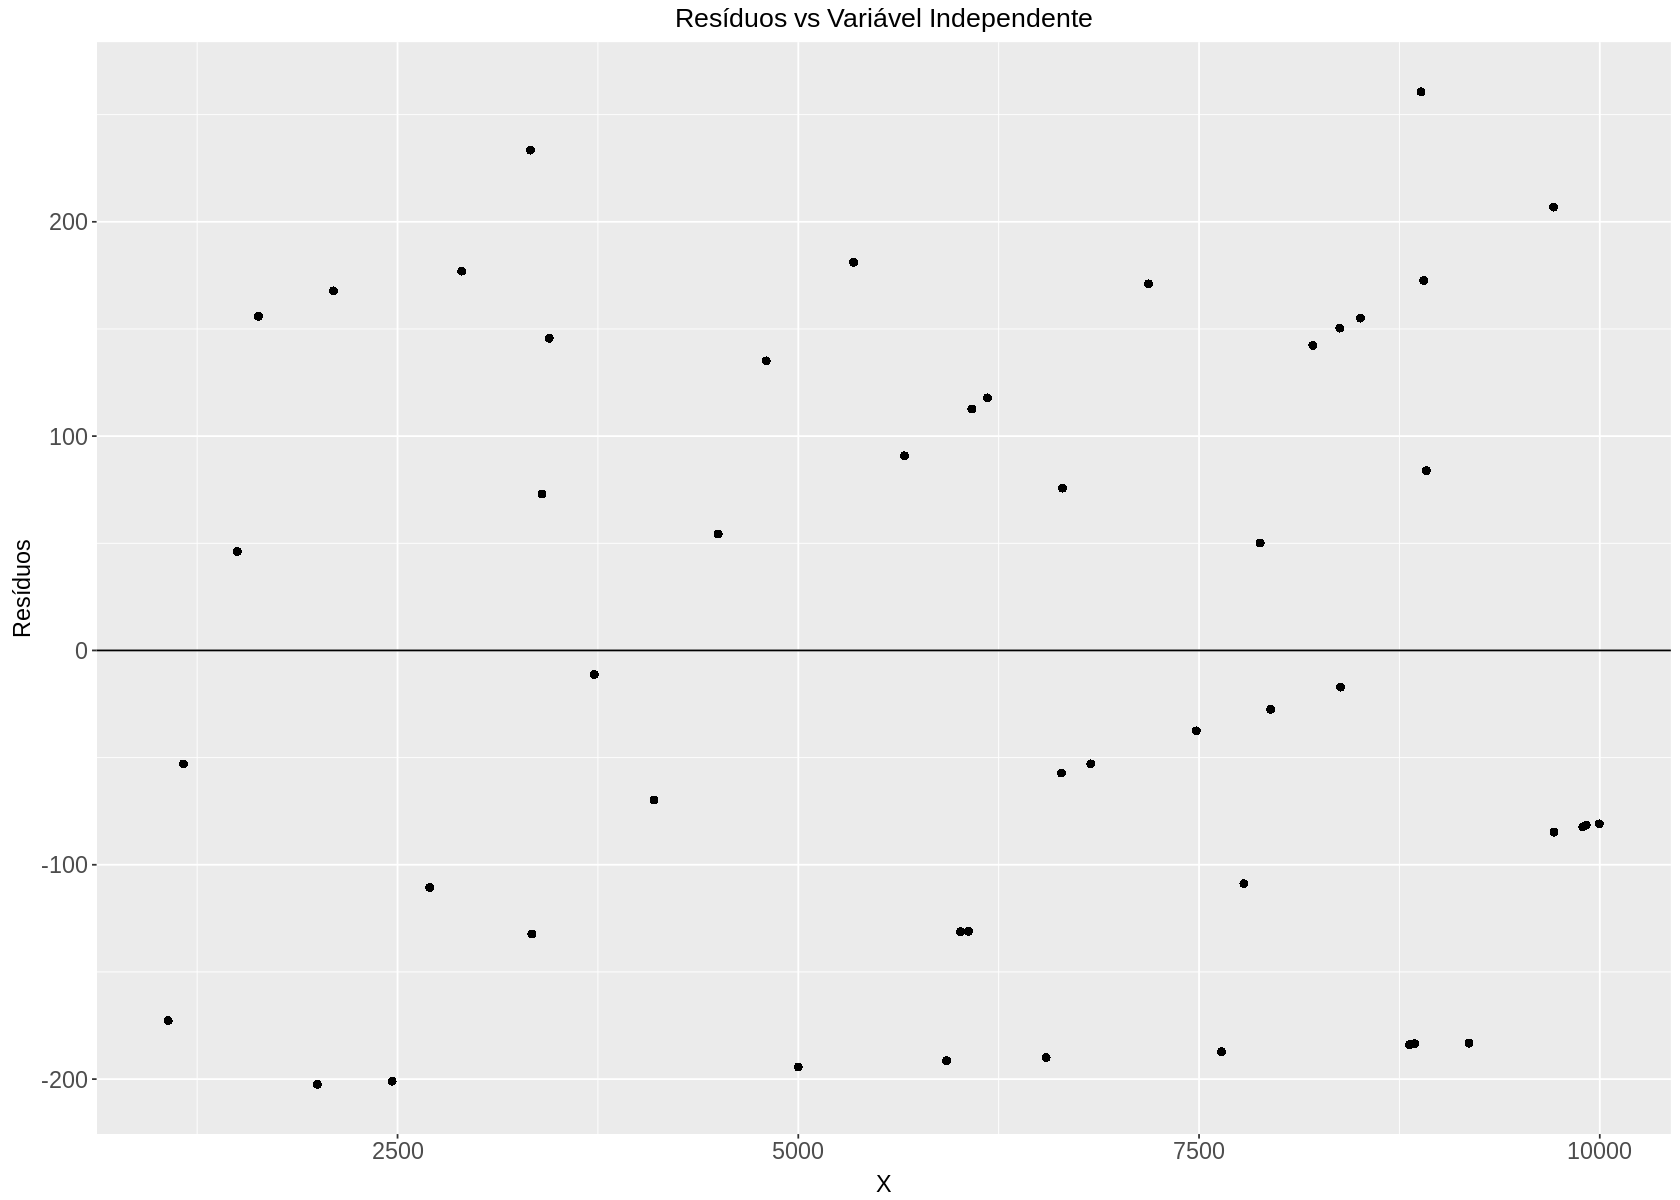

In [74]:
ggplot(data = dataset, aes(x = X, y = Residuos)) +
    geom_hline(yintercept = 0, color = 'black') +
    geom_point(size = 2.5, stroke = 0) +
    xlab("X") +
    ylab("Resíduos") +
    ggtitle('Resíduos vs Variável Independente') +
    theme(
        plot.title = element_text(size = 16, hjust = 0.5),
        axis.title.y = element_text(size = 14, vjust = 0.2),
        axis.title.x = element_text(size = 14, vjust = -0.2),
        axis.text.y = element_text(size = 14),
        axis.text.x = element_text(size = 14)
    )


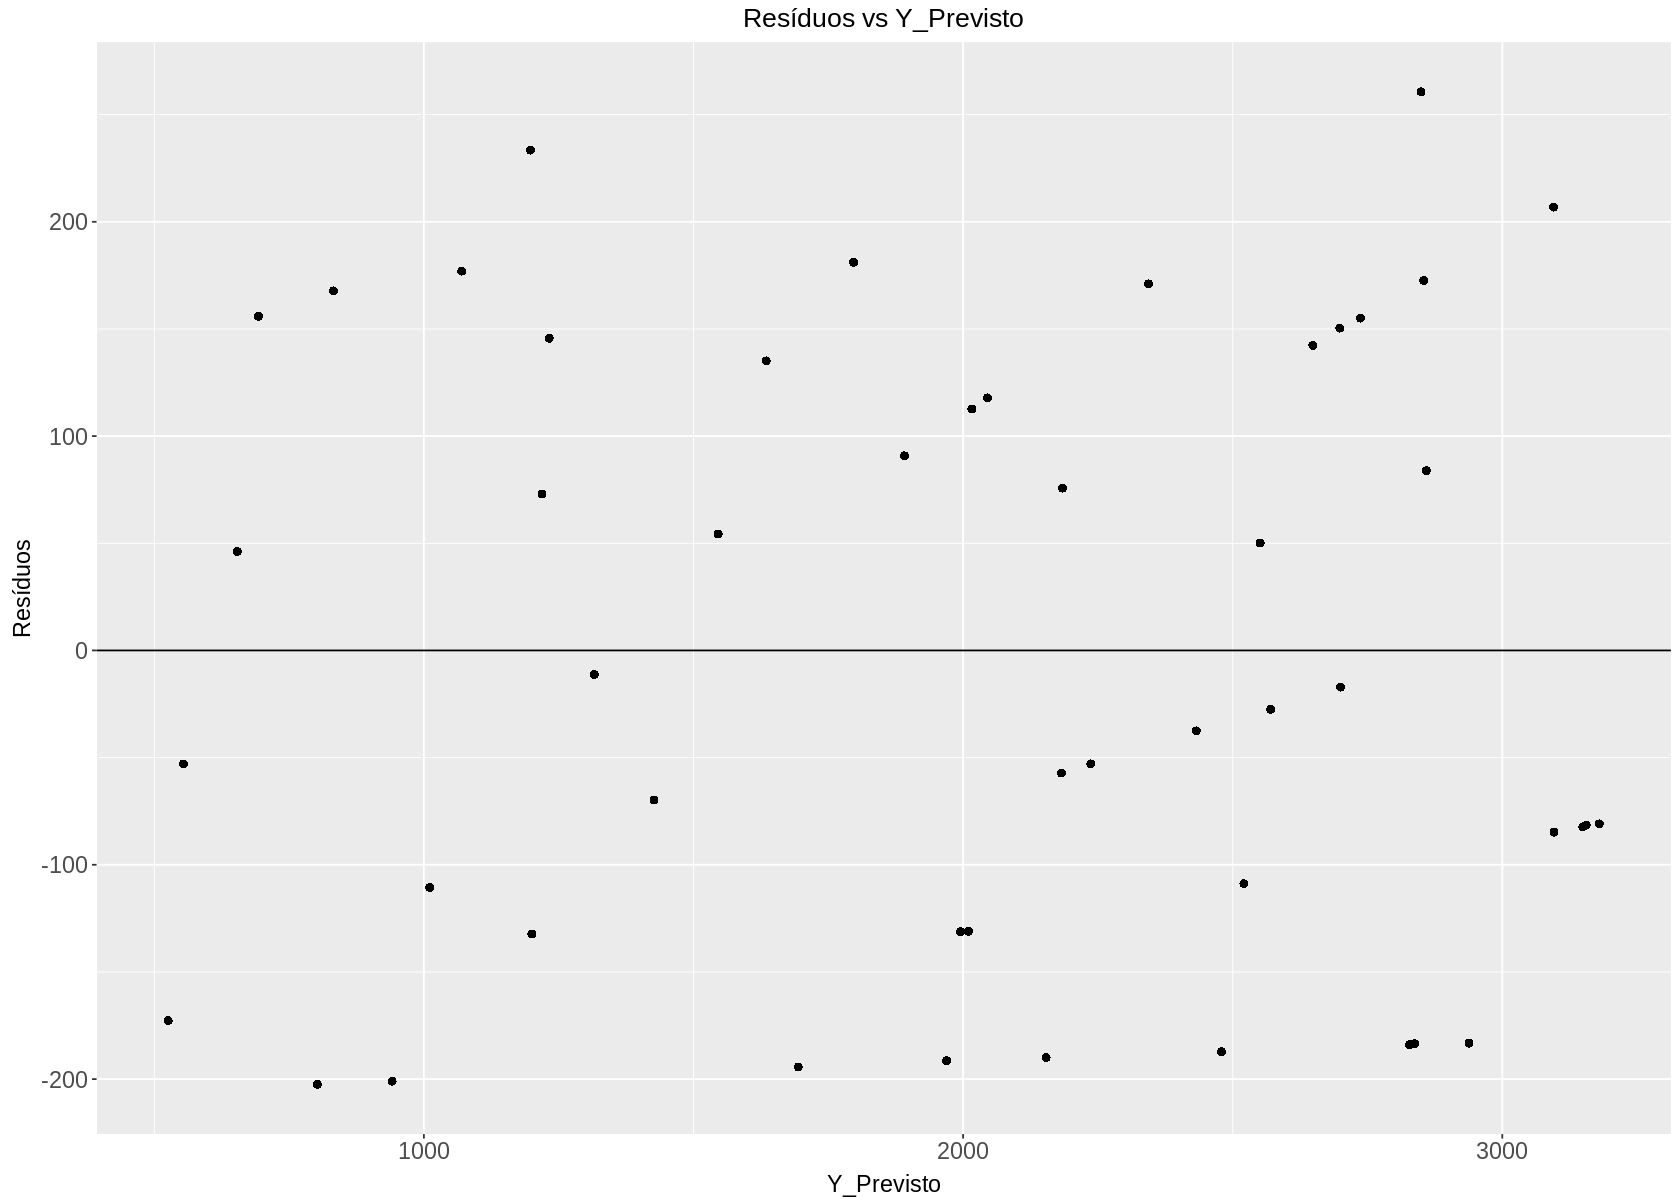

In [75]:
ggplot(data = dataset, aes(x = Y_previsto, y = Residuos)) +
    geom_hline(yintercept = 0, color = 'black') +
    geom_point(size = 2.5, stroke = 0) +
    xlab("Y_Previsto") +
    ylab("Resíduos") +
    ggtitle('Resíduos vs Y_Previsto') +
    theme(
        plot.title = element_text(size = 16, hjust = 0.5),
        axis.title.y = element_text(size = 14, vjust = 0.2),
        axis.title.x = element_text(size = 14, vjust = -0.2),
        axis.text.y = element_text(size = 14),
        axis.text.x = element_text(size = 14)
    )

### Hipótese de variância constante

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img028.jpg" width=80%>

Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

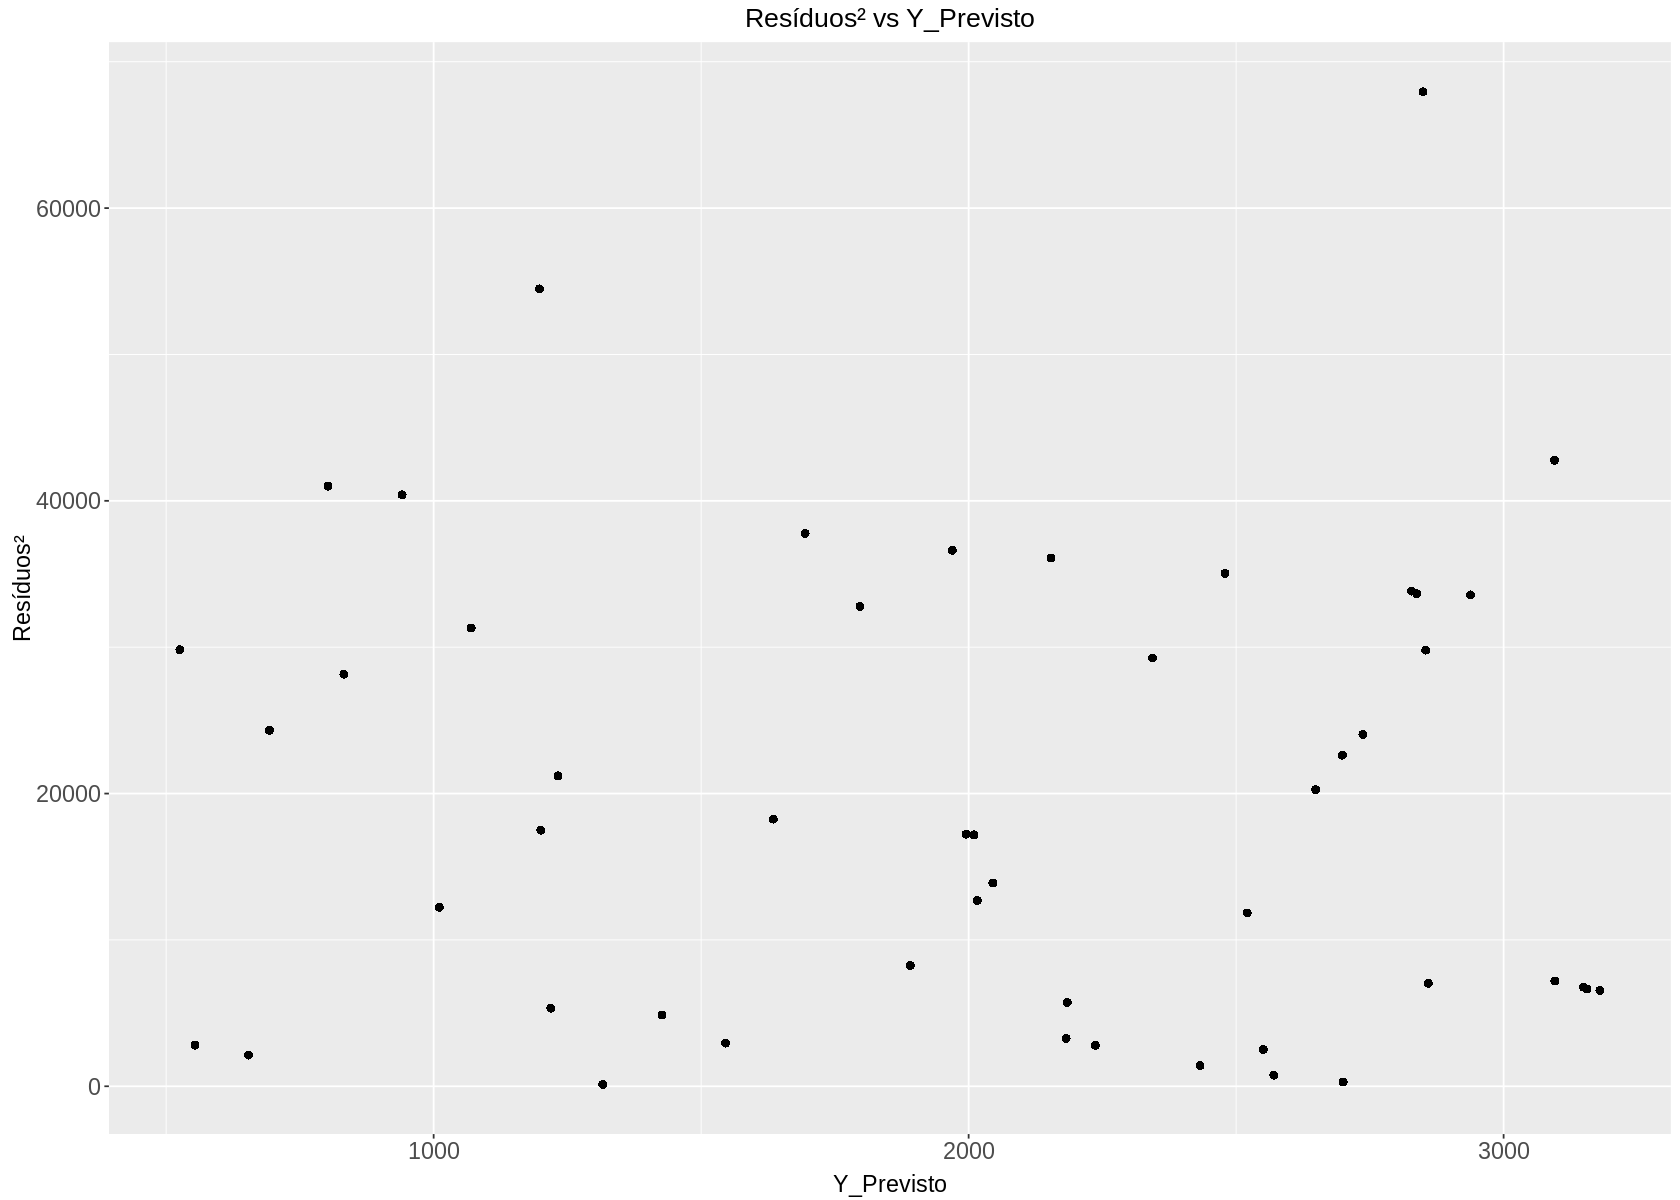

In [76]:
ggplot(data = dataset, aes(x = Y_previsto, y = Residuos^2)) +
    geom_point(size = 2.5, stroke = 0) +
    xlab("Y_Previsto") +
    ylab("Resíduos²") +
    ggtitle('Resíduos² vs Y_Previsto') +
    theme(
        plot.title = element_text(size = 16, hjust = 0.5),
        axis.title.y = element_text(size = 14, vjust = 0.2),
        axis.title.x = element_text(size = 14, vjust = -0.2),
        axis.text.y = element_text(size = 14),
        axis.text.x = element_text(size = 14)
    )

## <font color=green>4.7 O coeficiente de determinação $R^2$</font>
***

O **coeficiente de determinação R²** é uma medida resumida que diz quanto a linha de regressão amostral se ajusta aos dados. Pode ser obtido a partir da seguinte fórmula:

# $$R^2 = \frac{\big[\sum{(Y_i - \bar{Y})(\hat{Y}_i - \bar{Y})}\big]^2}{\sum{(Y_i - \bar{Y}})^2 \sum{(\hat{Y}_i - \bar{Y}})^2}$$

Sabemos que o i-ésimo resíduo representa o erro de usarmos $\hat{Y}_i$ para estimar $Y_i$. A soma dos quadrados desses resíduos é o valor que é minimizado pelo método dos mínimos quadrados. Esse valor pode ser representado da seguinte forma:

# $$SQE = \sum{(Y_i - \hat{Y}_i)^2}$$

O valor da SQE é uma medida do erro de se usar a equação de regressão estimada para estimar os valores da variável dependente na amostra.

Outro componente que podemos medir é a soma dos quadrados total (SQT) que representa a medida do erro envolvido no uso da média ($\bar{Y}$) para fazer as estimativas. A SQT pode ser representada da forma abaixo:

# $$SQT = \sum{(Y_i - \bar{Y})^2}$$

Para quantificar o quanto os valores estimados ($\hat{Y}_i$) se afastam da média ($\bar{Y}$) podemos obter mais uma soma de quadrados. Essa soma é chamada de soma dos quadrados da regressão (SQR) e é representada pela seguinte fórmula:

# $$SQR = \sum{(\hat{Y}_i - \bar{Y})^2}$$


### Soma do quadrados do erros (SQE)

In [77]:
head(dataset)

,Y,X,Y_previsto,Residuos
,<dbl>,<dbl>,<dbl>,<dbl>
1,3011,9714,3095.785,-84.78509
2,1305,3728,1316.203,-11.20301
3,1879,6062,2010.079,-131.07948
4,2654,8845,2837.439,-183.43948
5,2849,8378,2698.605,150.39528
6,1068,3338,1200.260,-132.25964


In [78]:
SQE <- sum(apply(dataset, 1, function(x) x['Residuos']^2))
SQE

[1] 984986

### Soma do quadrados total (SQT)

In [79]:
SQT <- sum(apply(dataset, 1, function(x) (x['Y']-mean(dataset$Y))^2))
SQT

[1] 32724149

### Soma do quadrados da regressão (SQR)

In [80]:
SQR <- sum(apply(dataset, 1, function(x) (x['Y_previsto']-mean(dataset$Y))^2))
SQR

[1] 31739163

### ANOVA

#### <font color=red>Documentações:

- [**anova**](https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/anova)

In [81]:
anova <- anova(resultado_regressao)
anova

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,31739163,31739163.24,1546.702,3.555543e-38
Residuals,48,984986,20520.54,NA,NA


In [82]:
anova[1,2]

[1] 31739163

In [83]:
anova[2,2]

[1] 984986

In [84]:
anova[1,2] + anova[2,2]   # soma dos quadrados total.

[1] 32724149

### Relação entre as somas de quadrados

# $$SQT = SQR + SQE$$

Onde,


### $SQE = \sum{(Y_i - \hat{Y}_i)^2}$

### $SQT = \sum{(Y_i - \bar{Y})^2}$

### $SQR = \sum{(\hat{Y}_i - \bar{Y})^2}$


<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img029.png" width=50%>

### Coeficiente de determinação (R²)

A regressão estimada teria um ajuste perfeito se todos os valores da variável dependente ($Y_i$) estiverem sobre a reta de regressão estimada. Quando isso ocorre temos $Y_i - \hat{Y}_i = 0$ para todas as observações, o que resulta em uma $SQE = 0$. Como $SQT=SQR+SQE$, é possível deduzir que para termos um ajuste perfeito $SQT$ deve ser igual a $SQR$ e a razão entre estas medidas ($\frac{SQR}{SQT}$) deve ser igual a 1.

Quando o ajuste não é tão perfeito nota-se que a $SQE$ apresenta valores maiores o que faz a razão $\frac{SQR}{SQT}$ diminuir, e em uma situação de total imperfeição do ajuste teríamos uma $SQR=0$ e $SQE=SQT$ levando a $\frac{SQR}{SQT}=0$.

A razão $\frac{SQR}{SQT}$, que assume valores entre 0 e 1, é utilizada como medida de eficiência do ajuste da equação de regressão estimada. Essa medida é conhecida como coeficiente de determinação (R²).

# $$R^2 = \frac{SQR}{SQT}$$

## <font color='red'>Observação</font>
> Somente com a utilização do R² não é possível tirar conclusões sobre a relação entre $Y$ e $X$ ser ou não ser estatisticamente
significativa. Este tipo de afirmação deve basear-se em considerações que envolvem o tamanho da amostra e as propriedades da distribuição amostral dos estimadores mínimos quadrados.

In [85]:
R2 <- SQR/SQT
R2

[1] 0.9699003

In [86]:
resumo <- summary (resultado_regressao)
resumo


Call:
lm(formula = Y ~ X, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-202.49 -125.96  -22.28  140.53  260.67 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.079e+02  5.013e+01   4.148 0.000136 ***
X           2.973e-01  7.559e-03  39.328  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 143.2 on 48 degrees of freedom
Multiple R-squared:  0.9699,	Adjusted R-squared:  0.9693 
F-statistic:  1547 on 1 and 48 DF,  p-value: < 2.2e-16


In [87]:
resumo$r.squared

[1] 0.9699003

Considere os dados do problema proposto em exercícios anteriores, onde se acredita que a posse de computadores tenha uma relação linear com a renda das famílias.

In [88]:
head(dataset_ex,5)

,Y,X
,<dbl>,<dbl>
1,670,1.59
2,220,0.56
3,1202,2.68
4,188,0.47
5,1869,5.20


Qual o valor do R² obtido da nossa regressão linear.

In [89]:
R2_ex<-summary(resultado_regressao_ex)
R2_ex$r.squared

[1] 0.9967917

Considere as duas informações abaixo:

$ R^2 = 0.96 $

$ SQR = 1.325.485 $

Qual o valor da soma dos quadrados dos erros (SQE)?.



Como SQT = SQR+SQE e

$R^2 = \frac{SQR}{SQT}$

Então:

$SQT = \frac{SQR}{R^2}$

In [90]:
SQT_ex = 1325485/0.96
SQT_ex


[1] 1380714

In [91]:
SQE_ex = SQT_ex - 1325485
SQE_ex

[1] 55228.54

## <font color=green>4.8 Testes aplicados a modelos de regressão</font>
***

Como vimos, em uma regressão linear simples, a média da variável dependente ($Y$) é uma função linear da variável independente ($X$):

# $$Y_i = \beta_1 + \beta_2X_i$$

Se o valor de $\beta_2$ for zero podemos verificar que o valor médio de $Y$ não depende do valor de $X$ e, portanto, concluímos que $X$ e $Y$ não estão linearmente relacionados. De forma alternativa, se o valor de $\beta_2$ não for igual a zero, concluímos que as duas variáveis estão relacionadas.

Para testar se a relação de regressão é significativa, é preciso realizar um **teste de hipóteses** para determinar se o valor de $\beta_2$ é zero. Antes de realizar este tipo de teste precisamos obter uma estimativa para $\sigma^2$ (variância do erro).

### Output do modelo de regressão estimado

In [92]:
resumo


Call:
lm(formula = Y ~ X, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-202.49 -125.96  -22.28  140.53  260.67 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.079e+02  5.013e+01   4.148 0.000136 ***
X           2.973e-01  7.559e-03  39.328  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 143.2 on 48 degrees of freedom
Multiple R-squared:  0.9699,	Adjusted R-squared:  0.9693 
F-statistic:  1547 on 1 and 48 DF,  p-value: < 2.2e-16


In [93]:
anova


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,31739163,31739163.24,1546.702,3.555543e-38
Residuals,48,984986,20520.54,NA,NA


### Erro quadrático médio - estimativa de $\sigma^2$

Lembre-se que a **soma dos quadrados do erros (SQE)** é uma medida numérica da variabilidade dos dados observados em torno da reta de regressão estimada. Todas as somas de quadrados, estudadas anteriormente, estão associadas a um determinado número de graus de liberdade. No caso da SQE, como devem ser estimados dois parâmetros, temos $n-2$ graus de liberdade.

O **erro quadrático médio**, representado pela equação abaixo, pode ser obtido dividindo-se a SQE por $n-2$ graus de liberdade.

# $$EQM = \frac{SQE}{n-2}$$

In [94]:
SQE

[1] 984986

In [95]:
n <- nrow(dataset)
n


[1] 50

In [96]:
EQM <- SQE / (n - 2)
EQM

[1] 20520.54

In [97]:
# segunda maneira de se obter o EQM
EQM <-anova$`Mean Sq`
EQM

[1] 31739163.24    20520.54

In [98]:
EQM <-anova$`Mean Sq`[2]  # pegando o segundo valor.
EQM

[1] 20520.54

# Continuando com nosso exercíco de antes e nosso dataset_ex


In [99]:
dataset_ex

Y,X
<dbl>,<dbl>
670,1.59
220,0.56
1202,2.68
188,0.47
1869,5.20
248,0.58
477,1.32
1294,3.88
816,2.11


Qual o valor do erro quadrático médio (EQM) obtido da nossa regressão linear.

In [100]:
anova_ex <-anova(resultado_regressao_ex)
anova_ex

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,858787220,858787220.5,7767.305,1.06586e-32
Residuals,25,2764109,110564.4,NA,NA


In [101]:
EQM_ex <-anova_ex$`Mean Sq`[2]
EQM_ex

[1] 110564.4

### Teste de hipótese para nulidade do coeficiente angular

Considere o seguinte modelo de regressão linear simples:

# $$Y_i = \beta_1 + \beta_2X_i + u_i$$

Se as variáveis $Y$ e $X$ são linearmente relacionadas, espera-se que $\beta_2$ seja diferente de zero. Para testar esta hipótese formulamos um teste de hipótese com a seguinte especificação de hipóteses nula e alternativa:

## $H_0: \beta_2 = 0$
## $H_1: \beta_2 \neq 0$

Caso $H_0$ seja rejeitada, concluiremos que existe uma relação linear estatisticamente significativa entre as duas variáveis.

Considere agora que $b_1$ e $b_2$ são nossos estimadores de mínimos quadrados. Considere que a distribuição amostral de $b_2$ segue uma normal e também as seguintes propriedades:

# $$E(b_2) = \beta_2$$
# $$\sigma_{b_2} = \frac{\sigma}{\sqrt{\sum{(X_i - \bar{X})^2}}}$$

Como não conhecemos o valor de $\sigma$, utilizamos $s$ como estimativa:

# $$s_{b_2} = \frac{s}{\sqrt{\sum{(X_i - \bar{X})^2}}}$$

Note que o valor esperado de $b_2$ é $\beta_2$, logo, $b_2$ é um estimador não viesado de $\beta_2$. Abaixo temos a estatística de teste (t) que segue uma distribuição t de Student com $n-2$ graus de liberdade.

# $$t = \frac{b_2 - \beta_2}{s_{b_2}}$$

### Calculando $s$

In [102]:
s <- sqrt(EQM)
s

[1] 143.2499

### Calculando
$\sum{(X_i - \bar{X})^2}$

In [103]:
SOMA_DESVIO2 <- sum(apply (dataset, 1, function(x) (x['X']-mean(dataset$X))^2))
SOMA_DESVIO2

[1] 359114426

### Calculando $s_{b_2}$

In [104]:
s_beta_2 <- s/sqrt(SOMA_DESVIO2)
s_beta_2

[1] 0.007559238

### Determinando as áreas de aceitação e rejeição de $H_0$

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img031.png)

### Níveis de confiança e significância

In [105]:
confianca <- 0.95
significancia <- 1- confianca

In [106]:
graus_de_liberdade <- resultado_regressao$df.residual
graus_de_liberdade
# ou (n-2)

[1] 48

### Obtendo $t_{\alpha/2}$

In [107]:
probabilidade <-(0.5) + (confianca/2)
probabilidade

[1] 0.975

In [108]:
t_alpha_2 <- qt(probabilidade,graus_de_liberdade)
t_alpha_2

[1] 2.010635

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img032.png)

### Obtendo

$t = \frac{b_2 - \beta_2}{s_{b_2}}$

## Atenção:
$b_2$  é o valor obtido na regressão

$\beta_2$  vem da nossa hipótese de teste, que é ZERO no caso

In [109]:
t <- (beta_2 - 0 )/s_beta_2 # cuidado  - o beta2 é o da regressão e o
t

[1] 39.32813

In [110]:
coeficientes <- resumo$coefficients
coeficientes

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),207.9033138,50.126682183,4.147558,1.362270e-04
X,0.2972907,0.007559238,39.328132,3.555543e-38


In [111]:
# OLHA NOSSO t CALCULADO ALI EM CIMA
coeficientes['X','t value']

[1] 39.32813

In [112]:
summary(resultado_regressao)


Call:
lm(formula = Y ~ X, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-202.49 -125.96  -22.28  140.53  260.67 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.079e+02  5.013e+01   4.148 0.000136 ***
X           2.973e-01  7.559e-03  39.328  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 143.2 on 48 degrees of freedom
Multiple R-squared:  0.9699,	Adjusted R-squared:  0.9693 
F-statistic:  1547 on 1 and 48 DF,  p-value: < 2.2e-16


![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img033.png)

### Etapas e regras de decisão do teste t de significância dos parâmetros

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img030.png" width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se $t \leq -t_{\alpha / 2}$ ou se $t \geq t_{\alpha / 2}$

In [113]:
t <= -t_alpha_2

[1] FALSE

In [114]:
t >= t_alpha_2

[1] TRUE

### <font color='red'>Critério do $p-valor$</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [115]:
p_valor <- 2*(pt(t, graus_de_liberdade, lower.tail = FALSE))
p_valor

[1] 3.555543e-38

In [116]:
p_valor <- coeficientes["X","Pr(>|t|)"]
p_valor

[1] 3.555543e-38

In [117]:
p_valor <= significancia

[1] TRUE

### <font color='green'>Conclusão: Rejeitamos $H_0$ e concluímos que existe uma relação significativa entre as duas variáveis.</font>

In [118]:
summary(resultado_regressao)


Call:
lm(formula = Y ~ X, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-202.49 -125.96  -22.28  140.53  260.67 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.079e+02  5.013e+01   4.148 0.000136 ***
X           2.973e-01  7.559e-03  39.328  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 143.2 on 48 degrees of freedom
Multiple R-squared:  0.9699,	Adjusted R-squared:  0.9693 
F-statistic:  1547 on 1 and 48 DF,  p-value: < 2.2e-16


In [119]:
anova

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,31739163,31739163.24,1546.702,3.555543e-38
Residuals,48,984986,20520.54,NA,NA


---

### Teste F

O teste F também é uma ferramenta para testar a significância na regressão. Baseado na distribuição F de probabilidade, o teste F é utilizado para verificar a significância global na regressão, isto é, em uma regressão múltipla, onde existe mais de uma variável independente, o teste F verifica a nulidade de todos os parâmetros do modelo conjuntamente.

Em nosso caso (regressão linear simples) ele fornece a mesma conclusão obtida com o teste t.

**Hipóteses:**

## $H_0: \beta_2 = 0$
## $H_0: \beta_2 \neq 0$

**Estatística de teste:**

# $$F = \frac{\frac{SQR}{k}}{\frac{SQE}{n-k-1}}$$

Onde,

$SQR$ - soma dos quadrados da regressão

$SQE$ - soma dos quadrados dos erros

$k$ - total de variáveis independentes ($X$)

**Regras de rejeição de $H_0$:**

**Critério do valor crítico** $\rightarrow$ Rejeitar se $F \geq F_{\alpha}$

Onde,

$F_{\alpha}$ - baseia-se na distribuição F com $k$ graus de liberdade no numerador e $n-k-1$ no denominador.

**Critério do p-valor** $\rightarrow$ Rejeitar se $p-valor \leq \alpha$

### Calculando a estatística de teste ($F$)

In [120]:
F<-anova['X','Mean Sq'] / anova['Residuals','Mean Sq']
F

[1] 1546.702

In [121]:
anova['X','F value']

[1] 1546.702

In [122]:
F <-
F

### Obtendo o p-valor

In [123]:
p_valor <- anova['X','Pr(>F)']
p_valor

[1] 3.555543e-38

In [124]:
p_valor <= significancia

[1] TRUE